# <b>Importing Dataset and Alligning the columns</b>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
print(os.listdir())
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


data = pd.read_csv('/content/heart.csv')

['.config', 'heart.csv', 'sample_data']


# <b><u>Data Visualization and Exploration</u></b>

In [3]:
data.head(2)
#printing first 2 rows of the data using the head function

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


In [4]:
print(type(data))
print(data.shape)
print(data.head())

<class 'pandas.core.frame.DataFrame'>
(1025, 14)
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [5]:
data.info()
print("\n")
print("The data frame has {} rows and {} columns".format(data.shape[0],data.shape[1]))

#To check the data type of the dataset imported and for checking any anomaly in data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


The data frame has 1025 rows and 14 columns


In [6]:
data.describe()

#The following output shows that the mean is always greater than median which represents data is positively skewed.

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


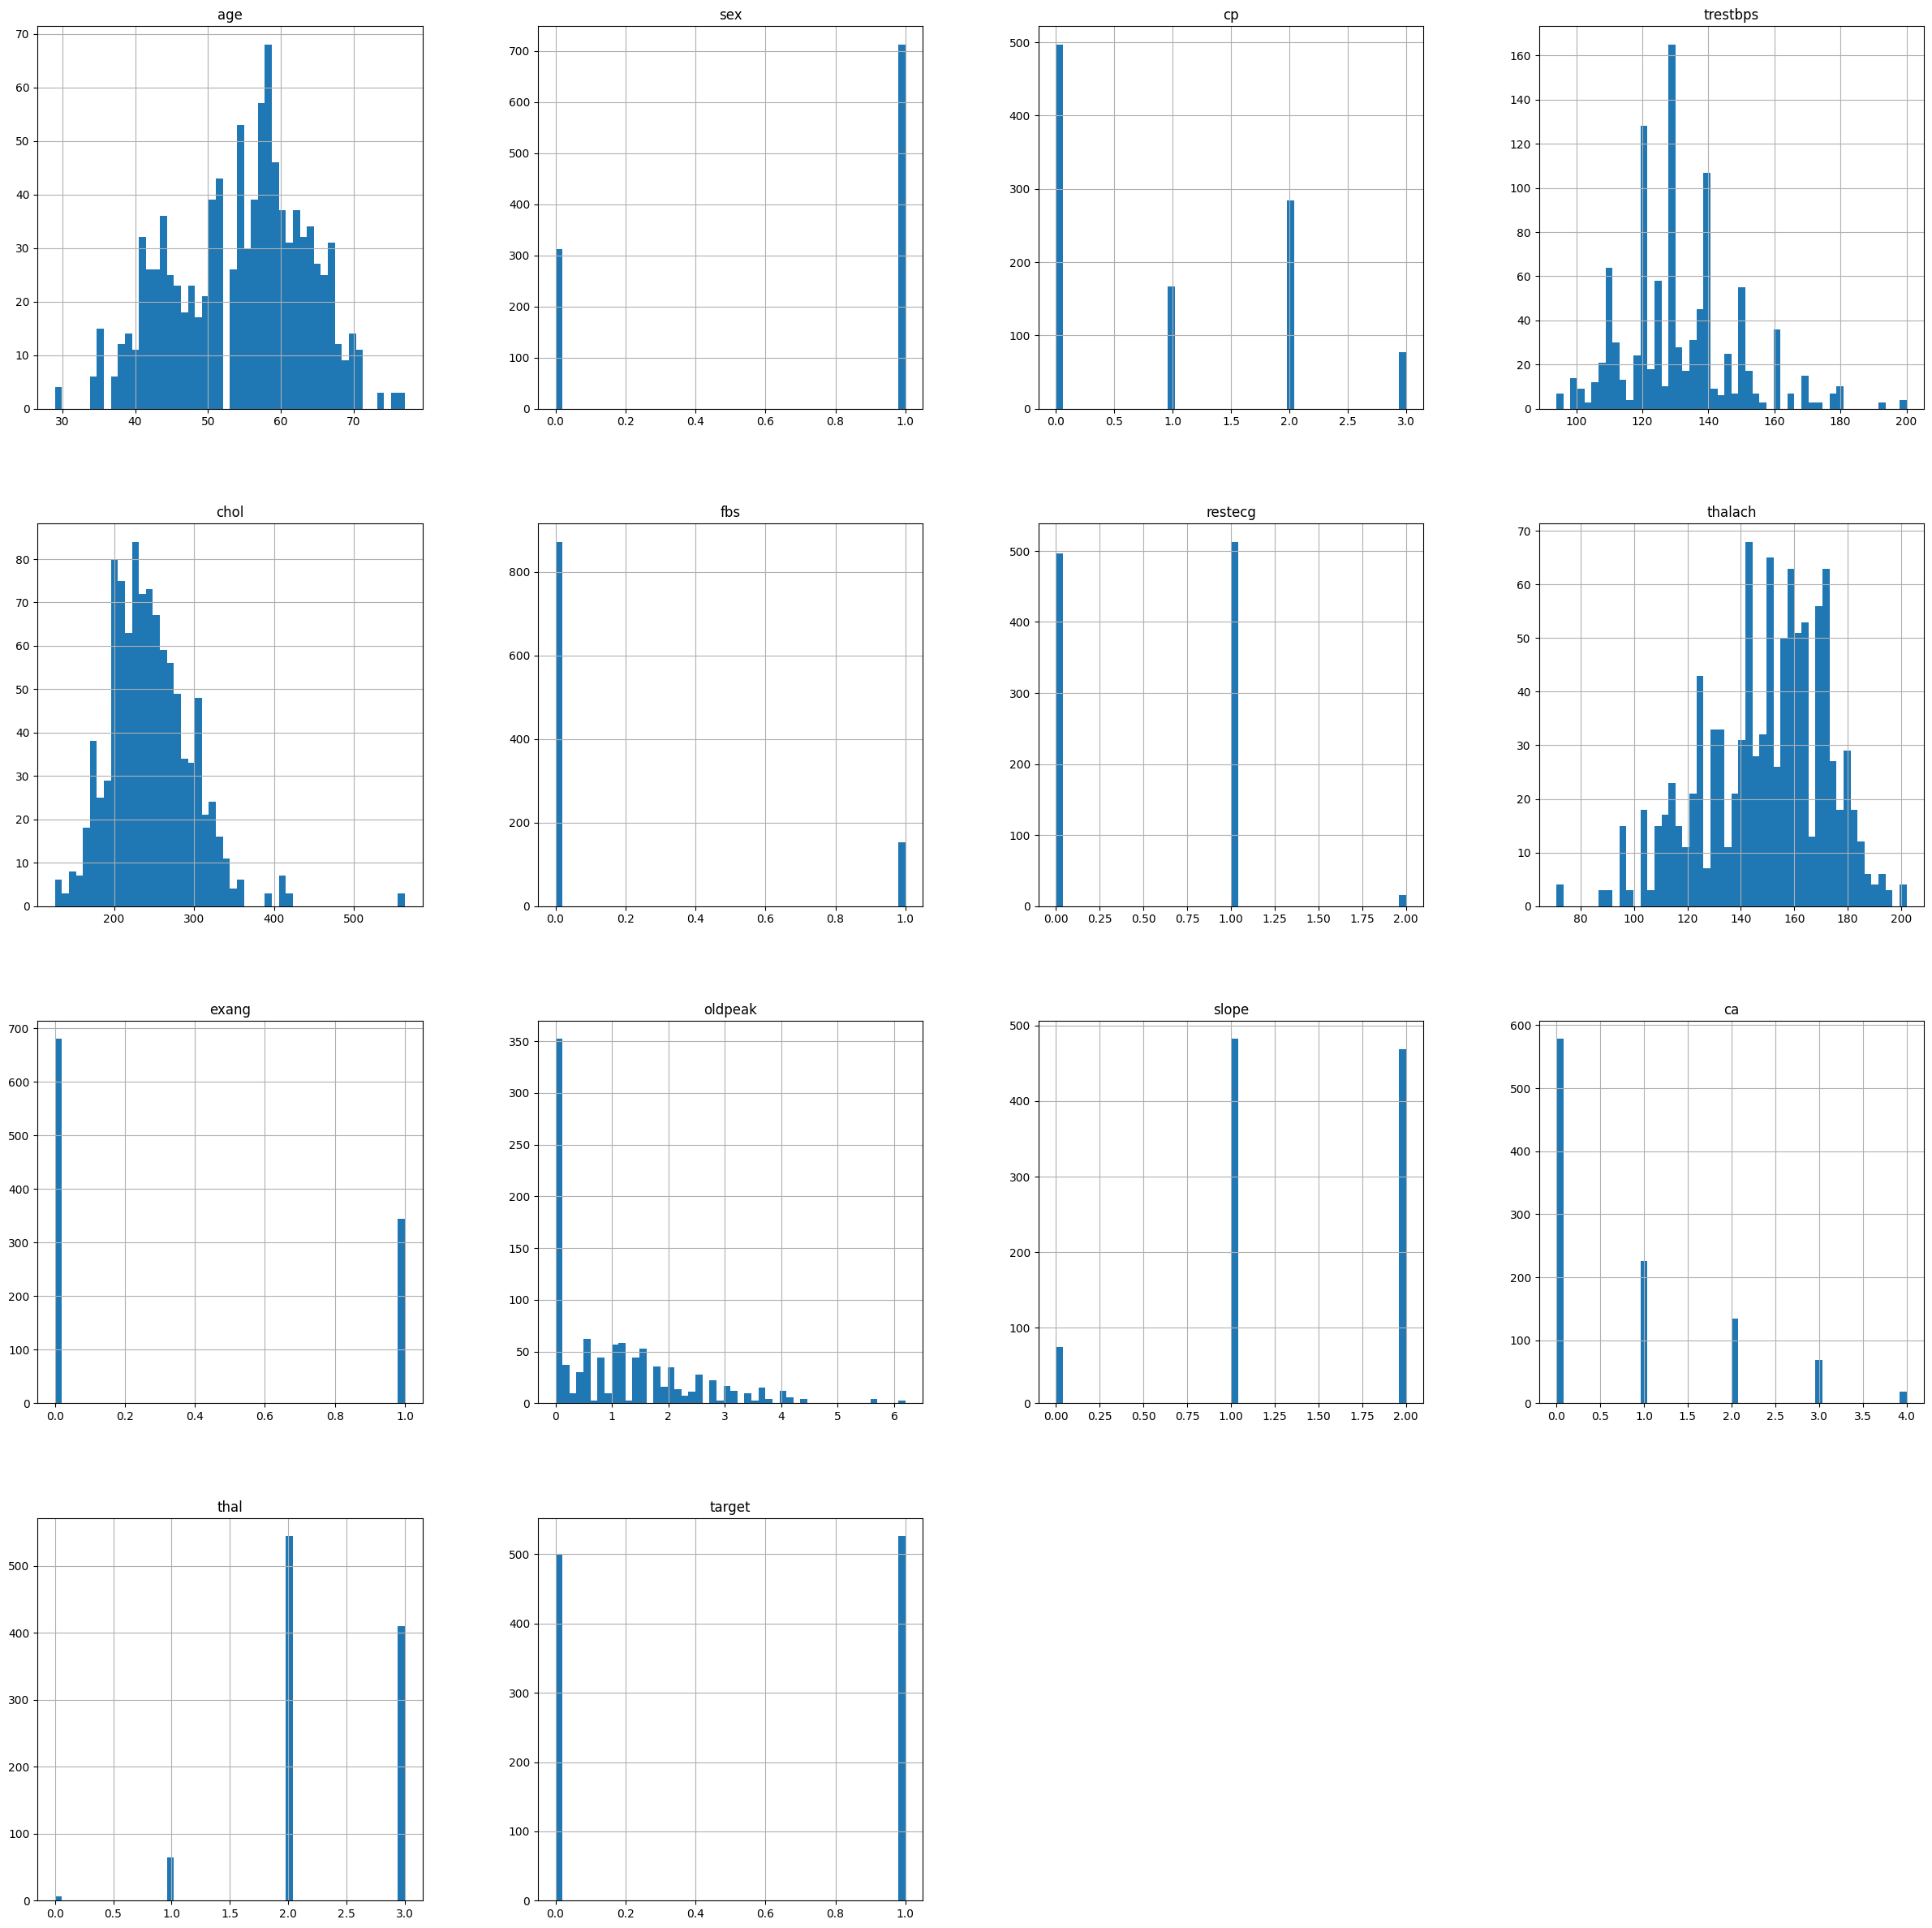

In [8]:
data.hist(bins=50, figsize=(30,30))
plt.show()

#Visualization of the data in histogram below

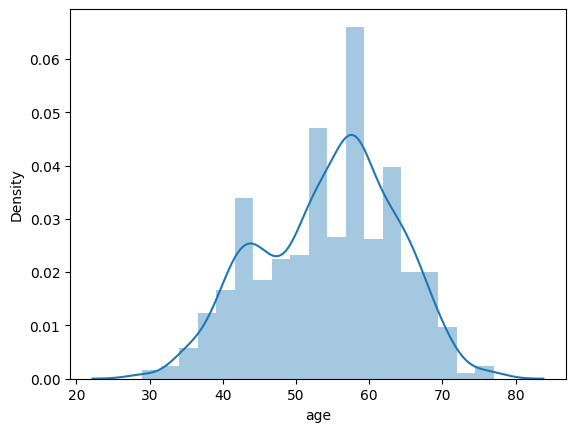

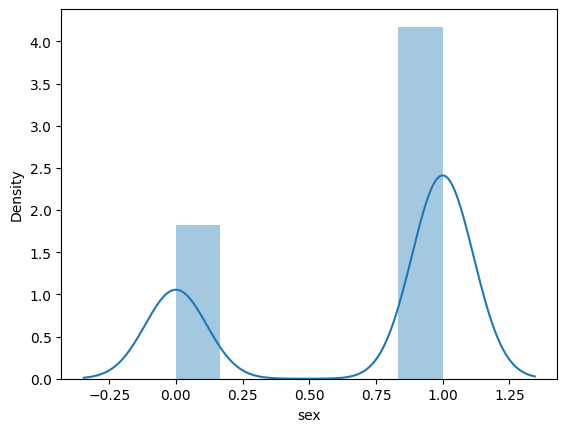

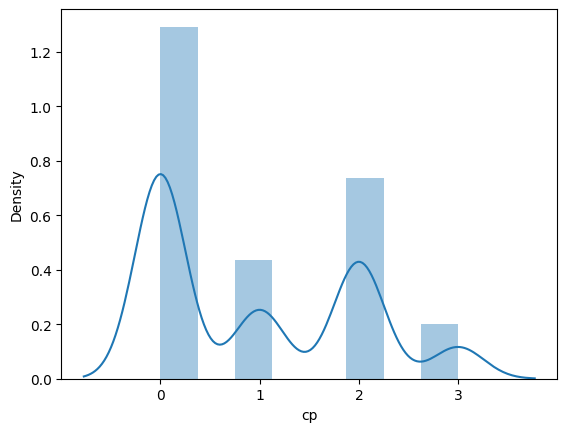

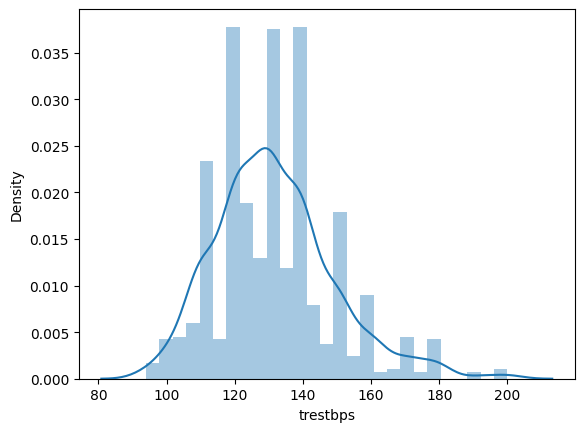

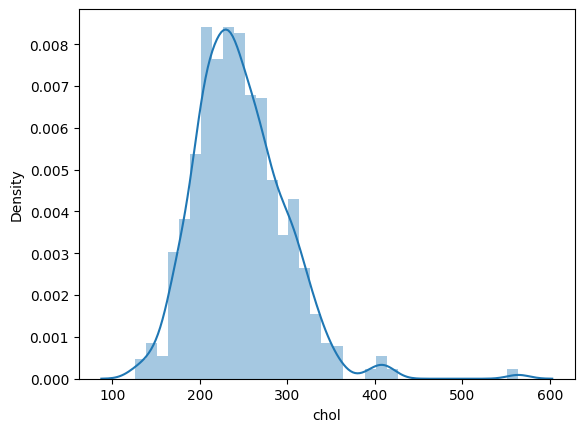

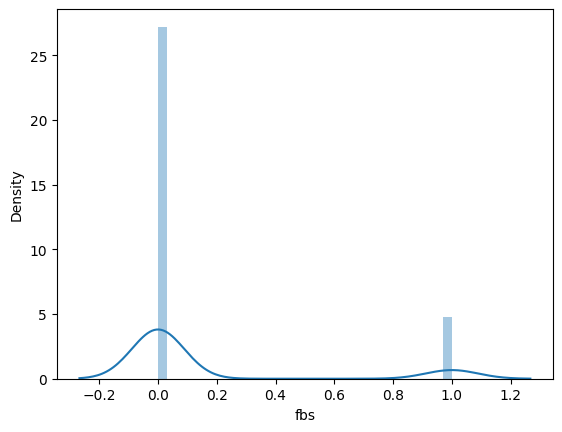

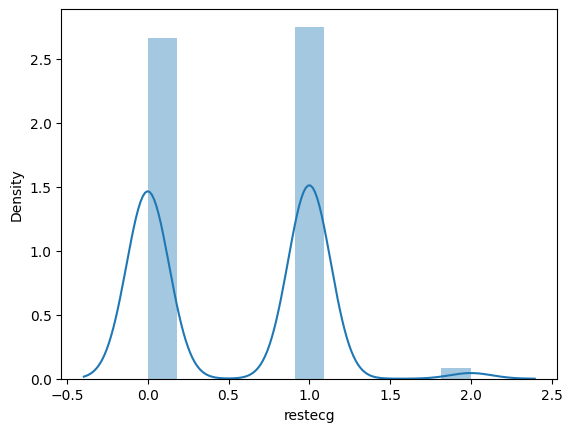

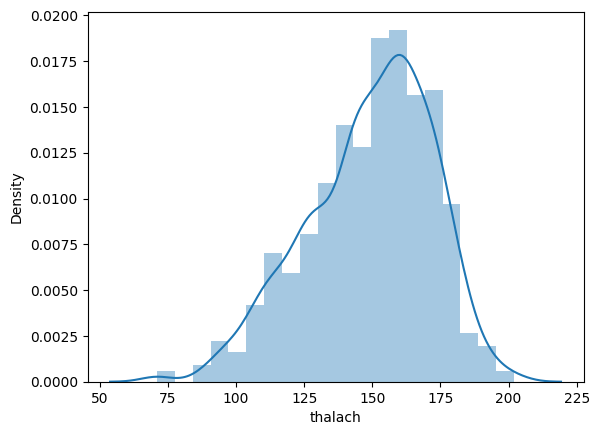

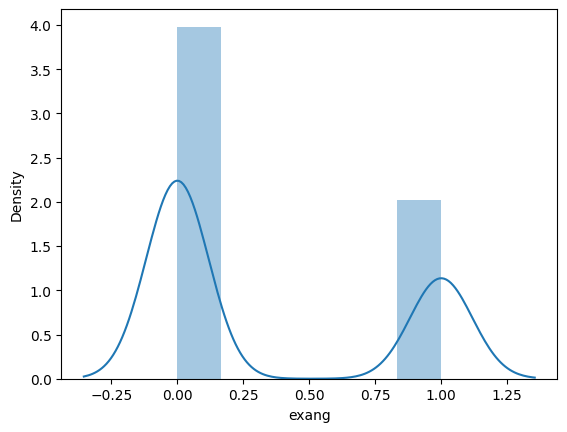

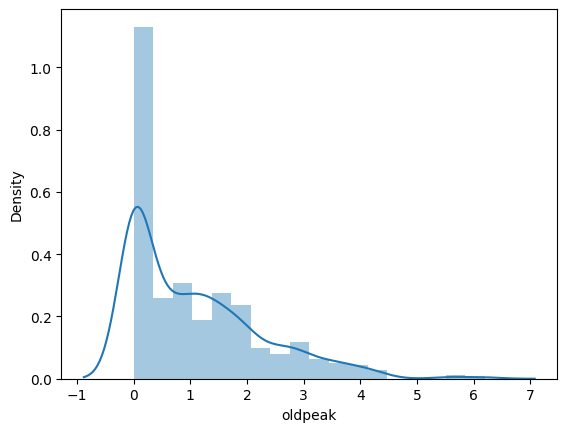

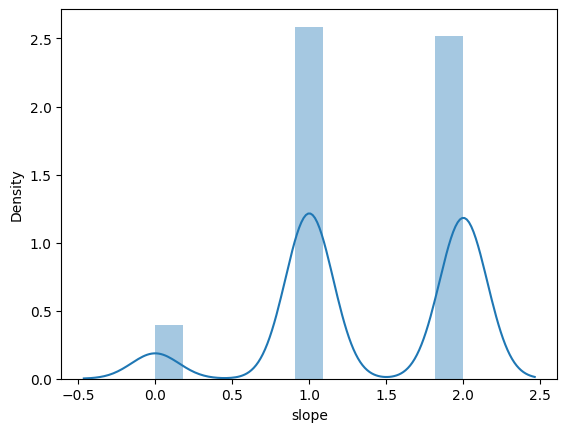

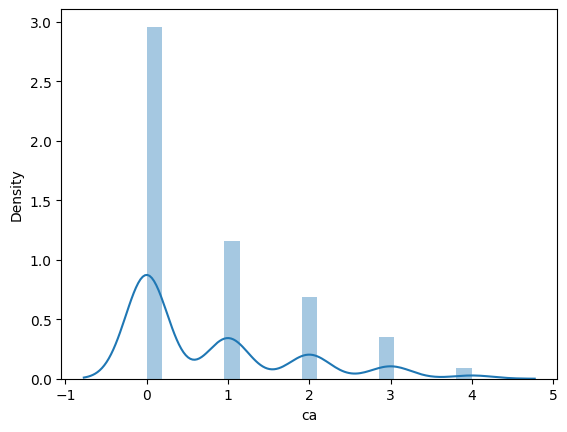

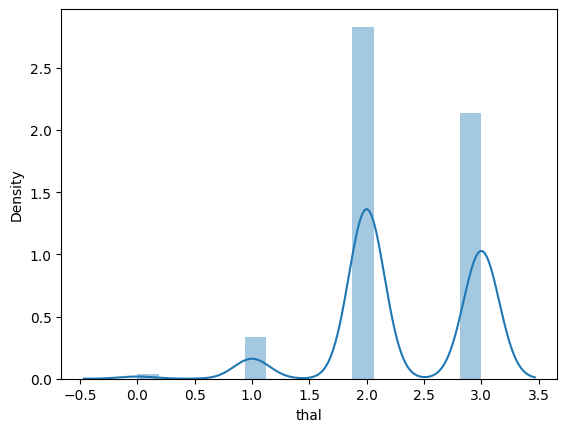

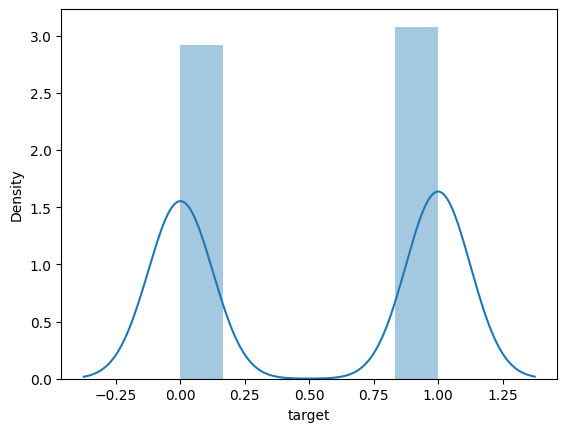

In [9]:
#Using seaborn to visualize the data

#WAY1

#Plot univariate distribution of data: age
sns.distplot(data["age"])
plt.show()

#Plot univariate distribution of data: sex
sns.distplot(data["sex"])
plt.show()

#Plot univariate distribution of data: cp
sns.distplot(data["cp"])
plt.show()

#Plot univariate distribution of data: trestbps
sns.distplot(data["trestbps"])
plt.show()

#Plot univariate distribution of data: chol
sns.distplot(data["chol"])
plt.show()

#Plot univariate distribution of data: fbs
sns.distplot(data["fbs"])
plt.show()

#Plot univariate distribution of data: restecg
sns.distplot(data["restecg"])
plt.show()

#Plot univariate distribution of data: thalach
sns.distplot(data["thalach"])
plt.show()

#Plot univariate distribution of data: exang
sns.distplot(data["exang"])
plt.show()

#Plot univariate distribution of data: oldpeak
sns.distplot(data["oldpeak"])
plt.show()

#Plot univariate distribution of data: slope
sns.distplot(data["slope"])
plt.show()

#Plot univariate distribution of data: ca
sns.distplot(data["ca"])
plt.show()

#Plot univariate distribution of data: thal
sns.distplot(data["thal"])
plt.show()

#Plot univariate distribution of data: target
sns.distplot(data["target"])
plt.show()

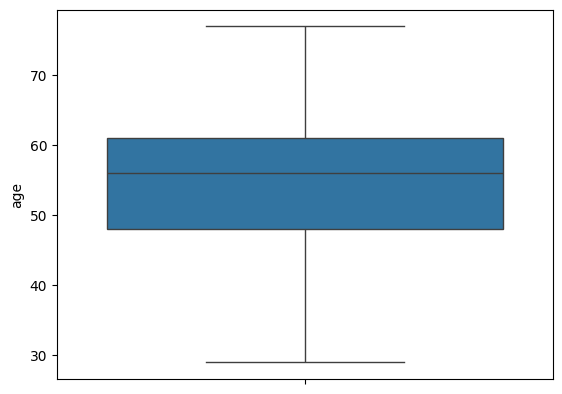

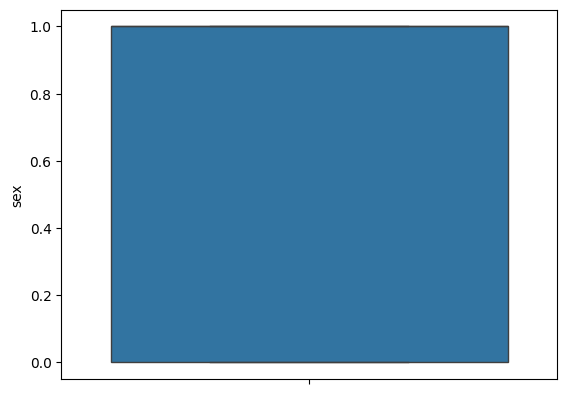

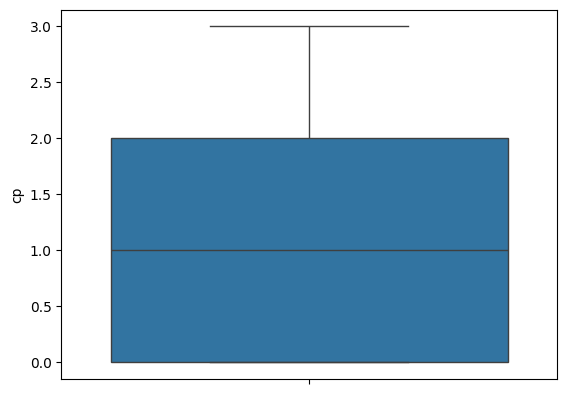

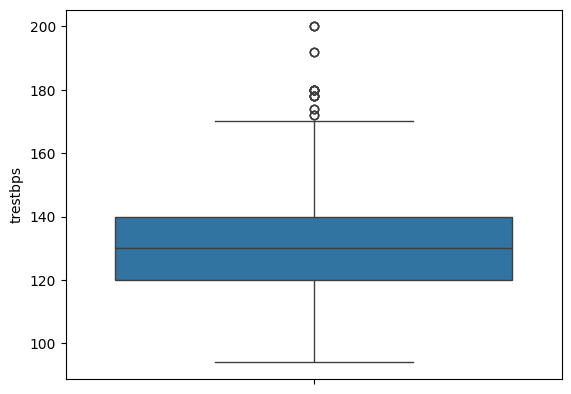

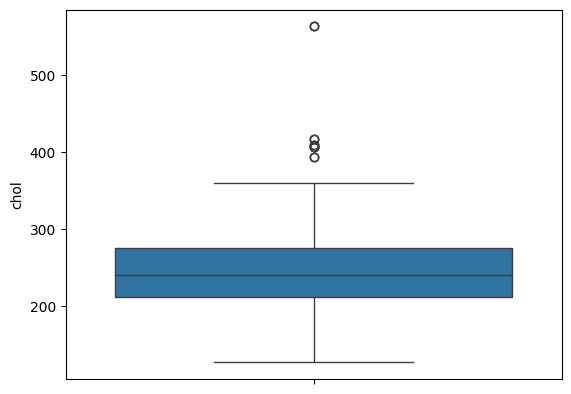

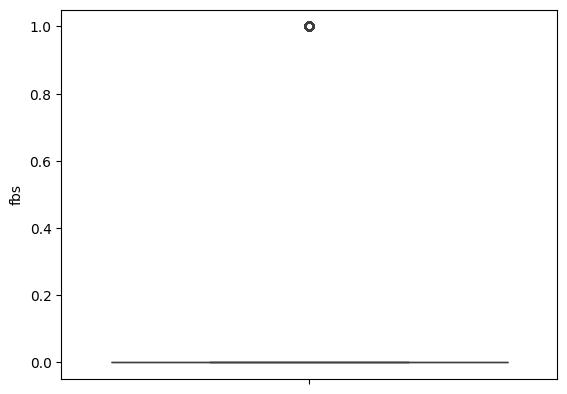

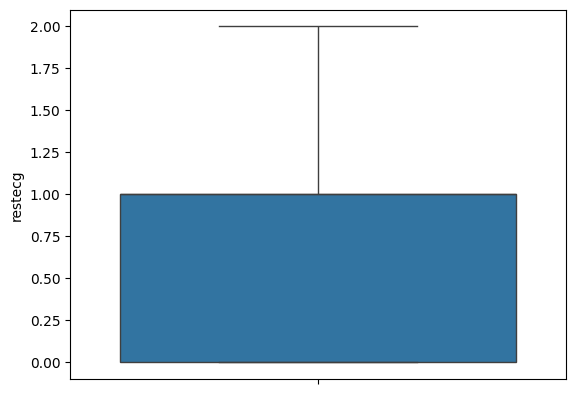

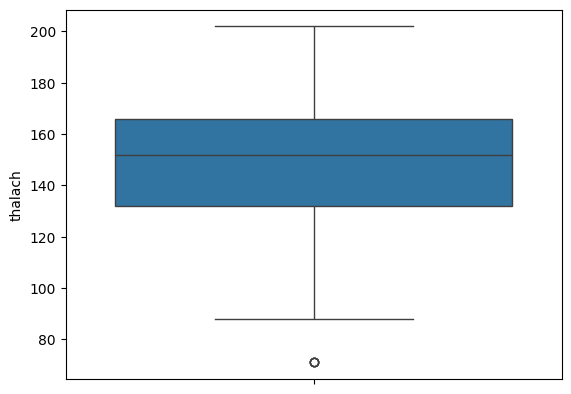

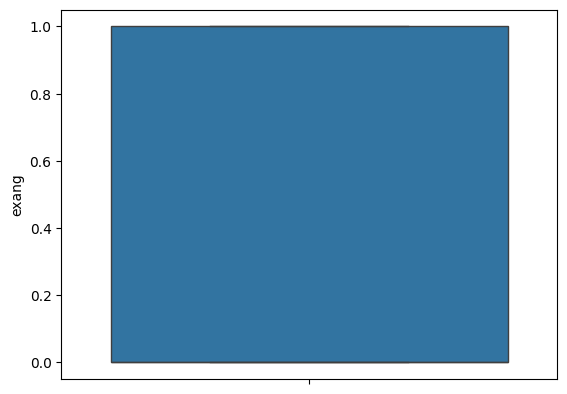

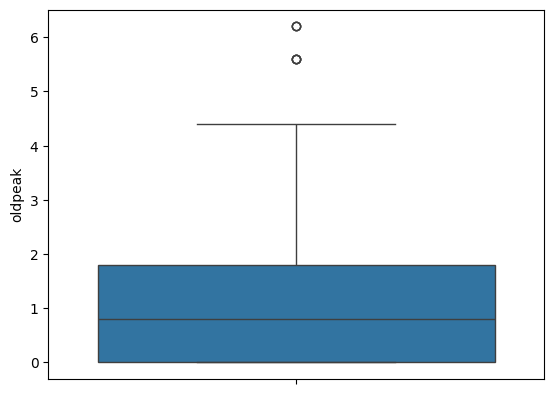

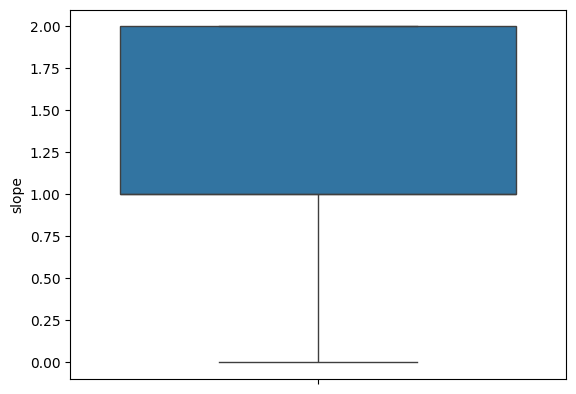

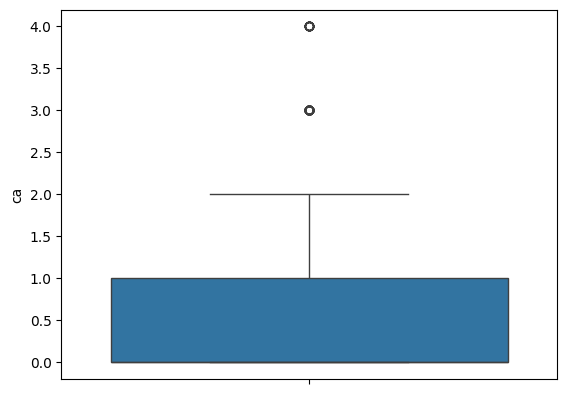

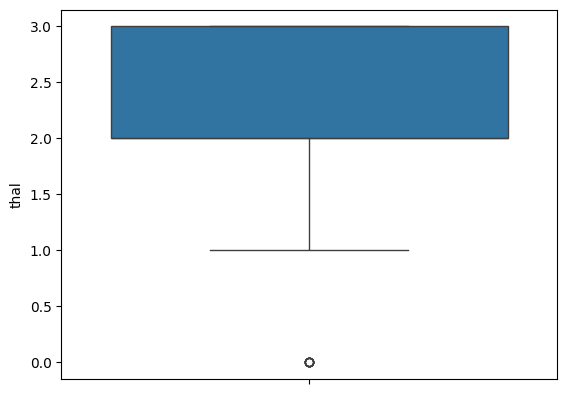

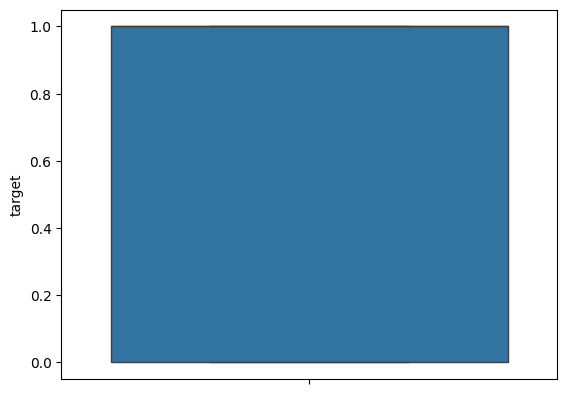

In [10]:
#Using seaborn to visualize the data

#WAY2

#Plot univariate distribution of data: age
sns.boxplot(data["age"])
plt.show()

#Plot univariate distribution of data: sex
sns.boxplot(data["sex"])
plt.show()

#Plot univariate distribution of data: cp
sns.boxplot(data["cp"])
plt.show()

#Plot univariate distribution of data: trestbps
sns.boxplot(data["trestbps"])
plt.show()

#Plot univariate distribution of data: chol
sns.boxplot(data["chol"])
plt.show()

#Plot univariate distribution of data: fbs
sns.boxplot(data["fbs"])
plt.show()

#Plot univariate distribution of data: restecg
sns.boxplot(data["restecg"])
plt.show()

#Plot univariate distribution of data: thalach
sns.boxplot(data["thalach"])
plt.show()

#Plot univariate distribution of data: exang
sns.boxplot(data["exang"])
plt.show()

#Plot univariate distribution of data: oldpeak
sns.boxplot(data["oldpeak"])
plt.show()

#Plot univariate distribution of data: slope
sns.boxplot(data["slope"])
plt.show()

#Plot univariate distribution of data: ca
sns.boxplot(data["ca"])
plt.show()

#Plot univariate distribution of data: thal
sns.boxplot(data["thal"])
plt.show()

#Plot univariate distribution of data: target
sns.boxplot(data["target"])
plt.show()



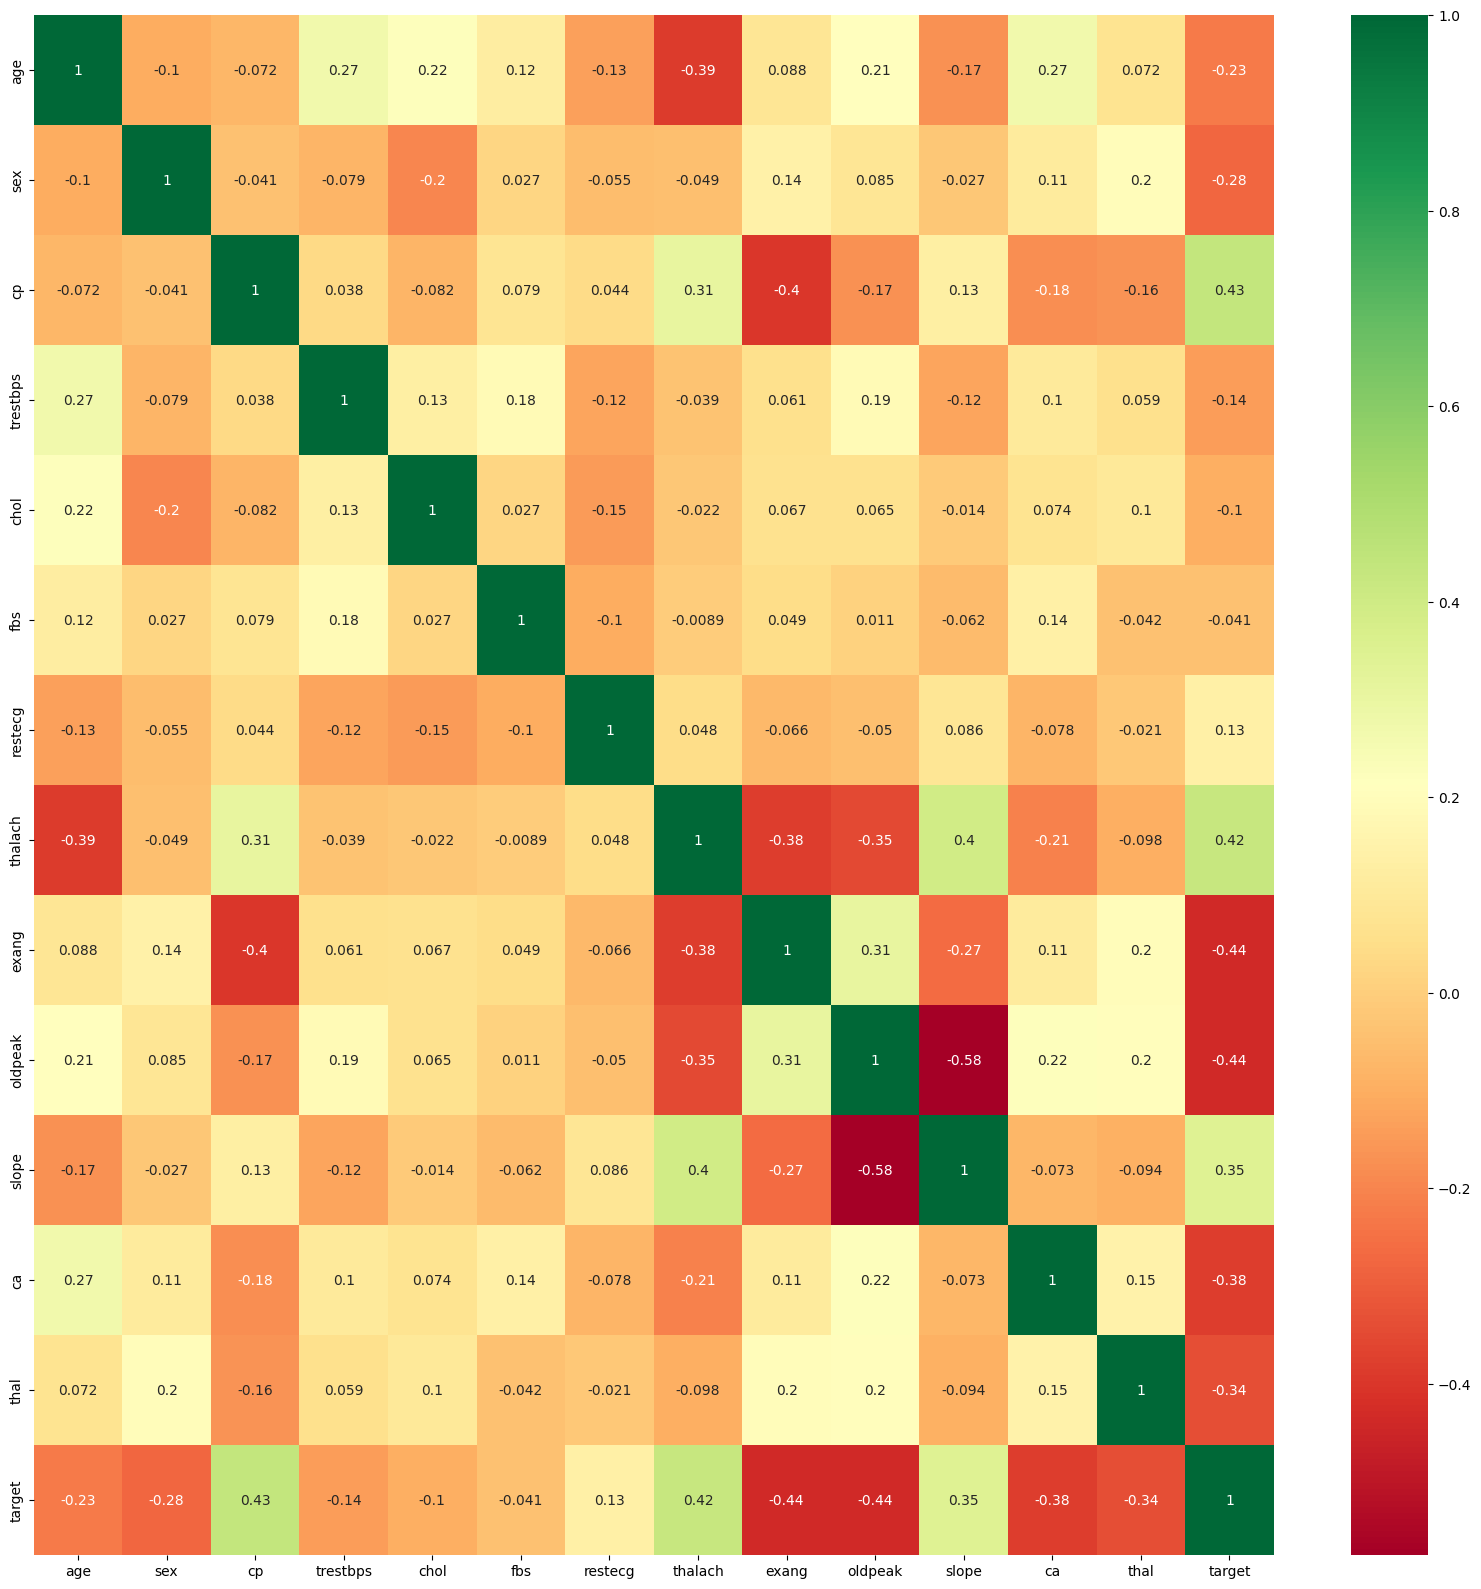

In [11]:
#obtain the correlation of each feature in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
sns.heatmap(data[top_corr_features].corr(),annot=True,cmap='RdYlGn')
plt.show()

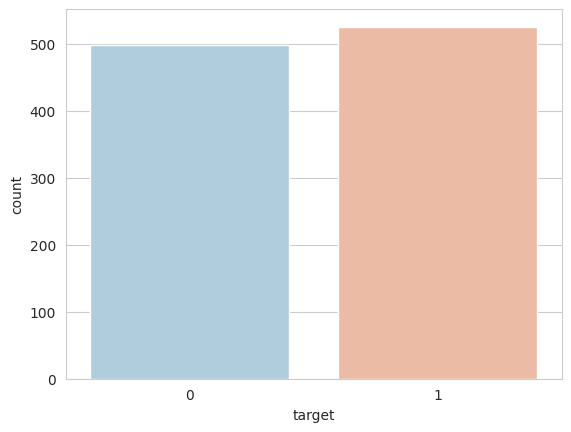

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=data,palette='RdBu_r')
plt.show()

In [13]:
#categorical vales
dataset = pd.get_dummies(data, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,52,125,212,168,1.0,0,False,True,True,False,...,True,False,False,True,False,False,False,False,False,True
1,53,140,203,155,3.1,0,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
2,70,145,174,125,2.6,0,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
3,61,148,203,161,0.0,0,False,True,True,False,...,True,False,True,False,False,False,False,False,False,True
4,62,138,294,106,1.9,0,True,False,True,False,...,False,False,False,False,True,False,False,False,True,False


In [14]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,-0.268437,-0.377636,-0.659332,0.821321,-0.060888,0,False,True,True,False,...,True,False,False,True,False,False,False,False,False,True
1,-0.158157,0.479107,-0.833861,0.255968,1.727137,0,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
2,1.716595,0.764688,-1.396233,-1.048692,1.301417,0,False,True,True,False,...,False,True,False,False,False,False,False,False,False,True
3,0.724079,0.936037,-0.833861,0.516900,-0.912329,0,False,True,True,False,...,True,False,True,False,False,False,False,False,False,True
4,0.834359,0.364875,0.930822,-1.874977,0.705408,0,True,False,True,False,...,False,False,False,False,True,False,False,False,True,False


In [15]:
predictors = dataset.drop('target',axis=1)
target = dataset['target']

In [16]:
print(target)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


Percentage of patient with or without heart problems in the given dataset

target
1    526
0    499
Name: count, dtype: int64


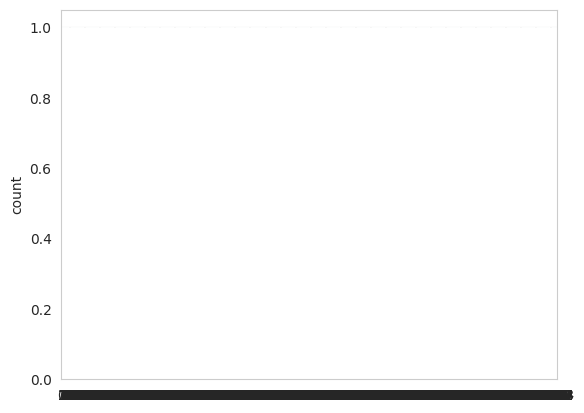

In [17]:
y = data["target"]
ax = sns.countplot(data["target"])
target_temp = data.target.value_counts()
print(target_temp)



In [18]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))
data["sex"].unique()

Percentage of patience without heart problems: 164.69
Percentage of patience with heart problems: 173.6


array([1, 0])

In [19]:
countFemale = len(data[data.sex == 0])
countMale = len(data[data.sex == 1])
print("Percentage of Female Patients:{:.2f}%".format((countFemale)/(len(data.sex))*100))
print("Percentage of Male Patients:{:.2f}%".format((countMale)/(len(data.sex))*100))

Percentage of Female Patients:30.44%
Percentage of Male Patients:69.56%


In [20]:
categorial = [('sex', ['female', 'male']),
              ('cp', ['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic']),
              ('fbs', ['fbs > 120mg', 'fbs < 120mg']),
              ('restecg', ['normal', 'ST-T wave', 'left ventricular']),
              ('exang', ['yes', 'no']),
              ('slope', ['upsloping', 'flat', 'downsloping']),
              ('thal', ['normal', 'fixed defect', 'reversible defect'])]

In [21]:
def plotGrid(isCategorial):
    if isCategorial:
        [plotCategorial(x[0], x[1], i) for i, x in enumerate(categorial)]
    else:
        [plotContinuous(x[0], x[1], i) for i, x in enumerate(continuous)]

In [22]:
def plotCategorial(attribute, labels, ax_index):
    sns.countplot(x=attribute, data=data, ax=axes[ax_index][0])
    sns.countplot(x='target', hue=attribute, data=data, ax=axes[ax_index][1])
    avg = data[[attribute, 'target']].groupby([attribute], as_index=False).mean()
    sns.barplot(x=attribute, y='target', hue=attribute, data=avg, ax=axes[ax_index][2])

    for t, l in zip(axes[ax_index][1].get_legend().texts, labels):
        t.set_text(l)
    for t, l in zip(axes[ax_index][2].get_legend().texts, labels):
        t.set_text(l)


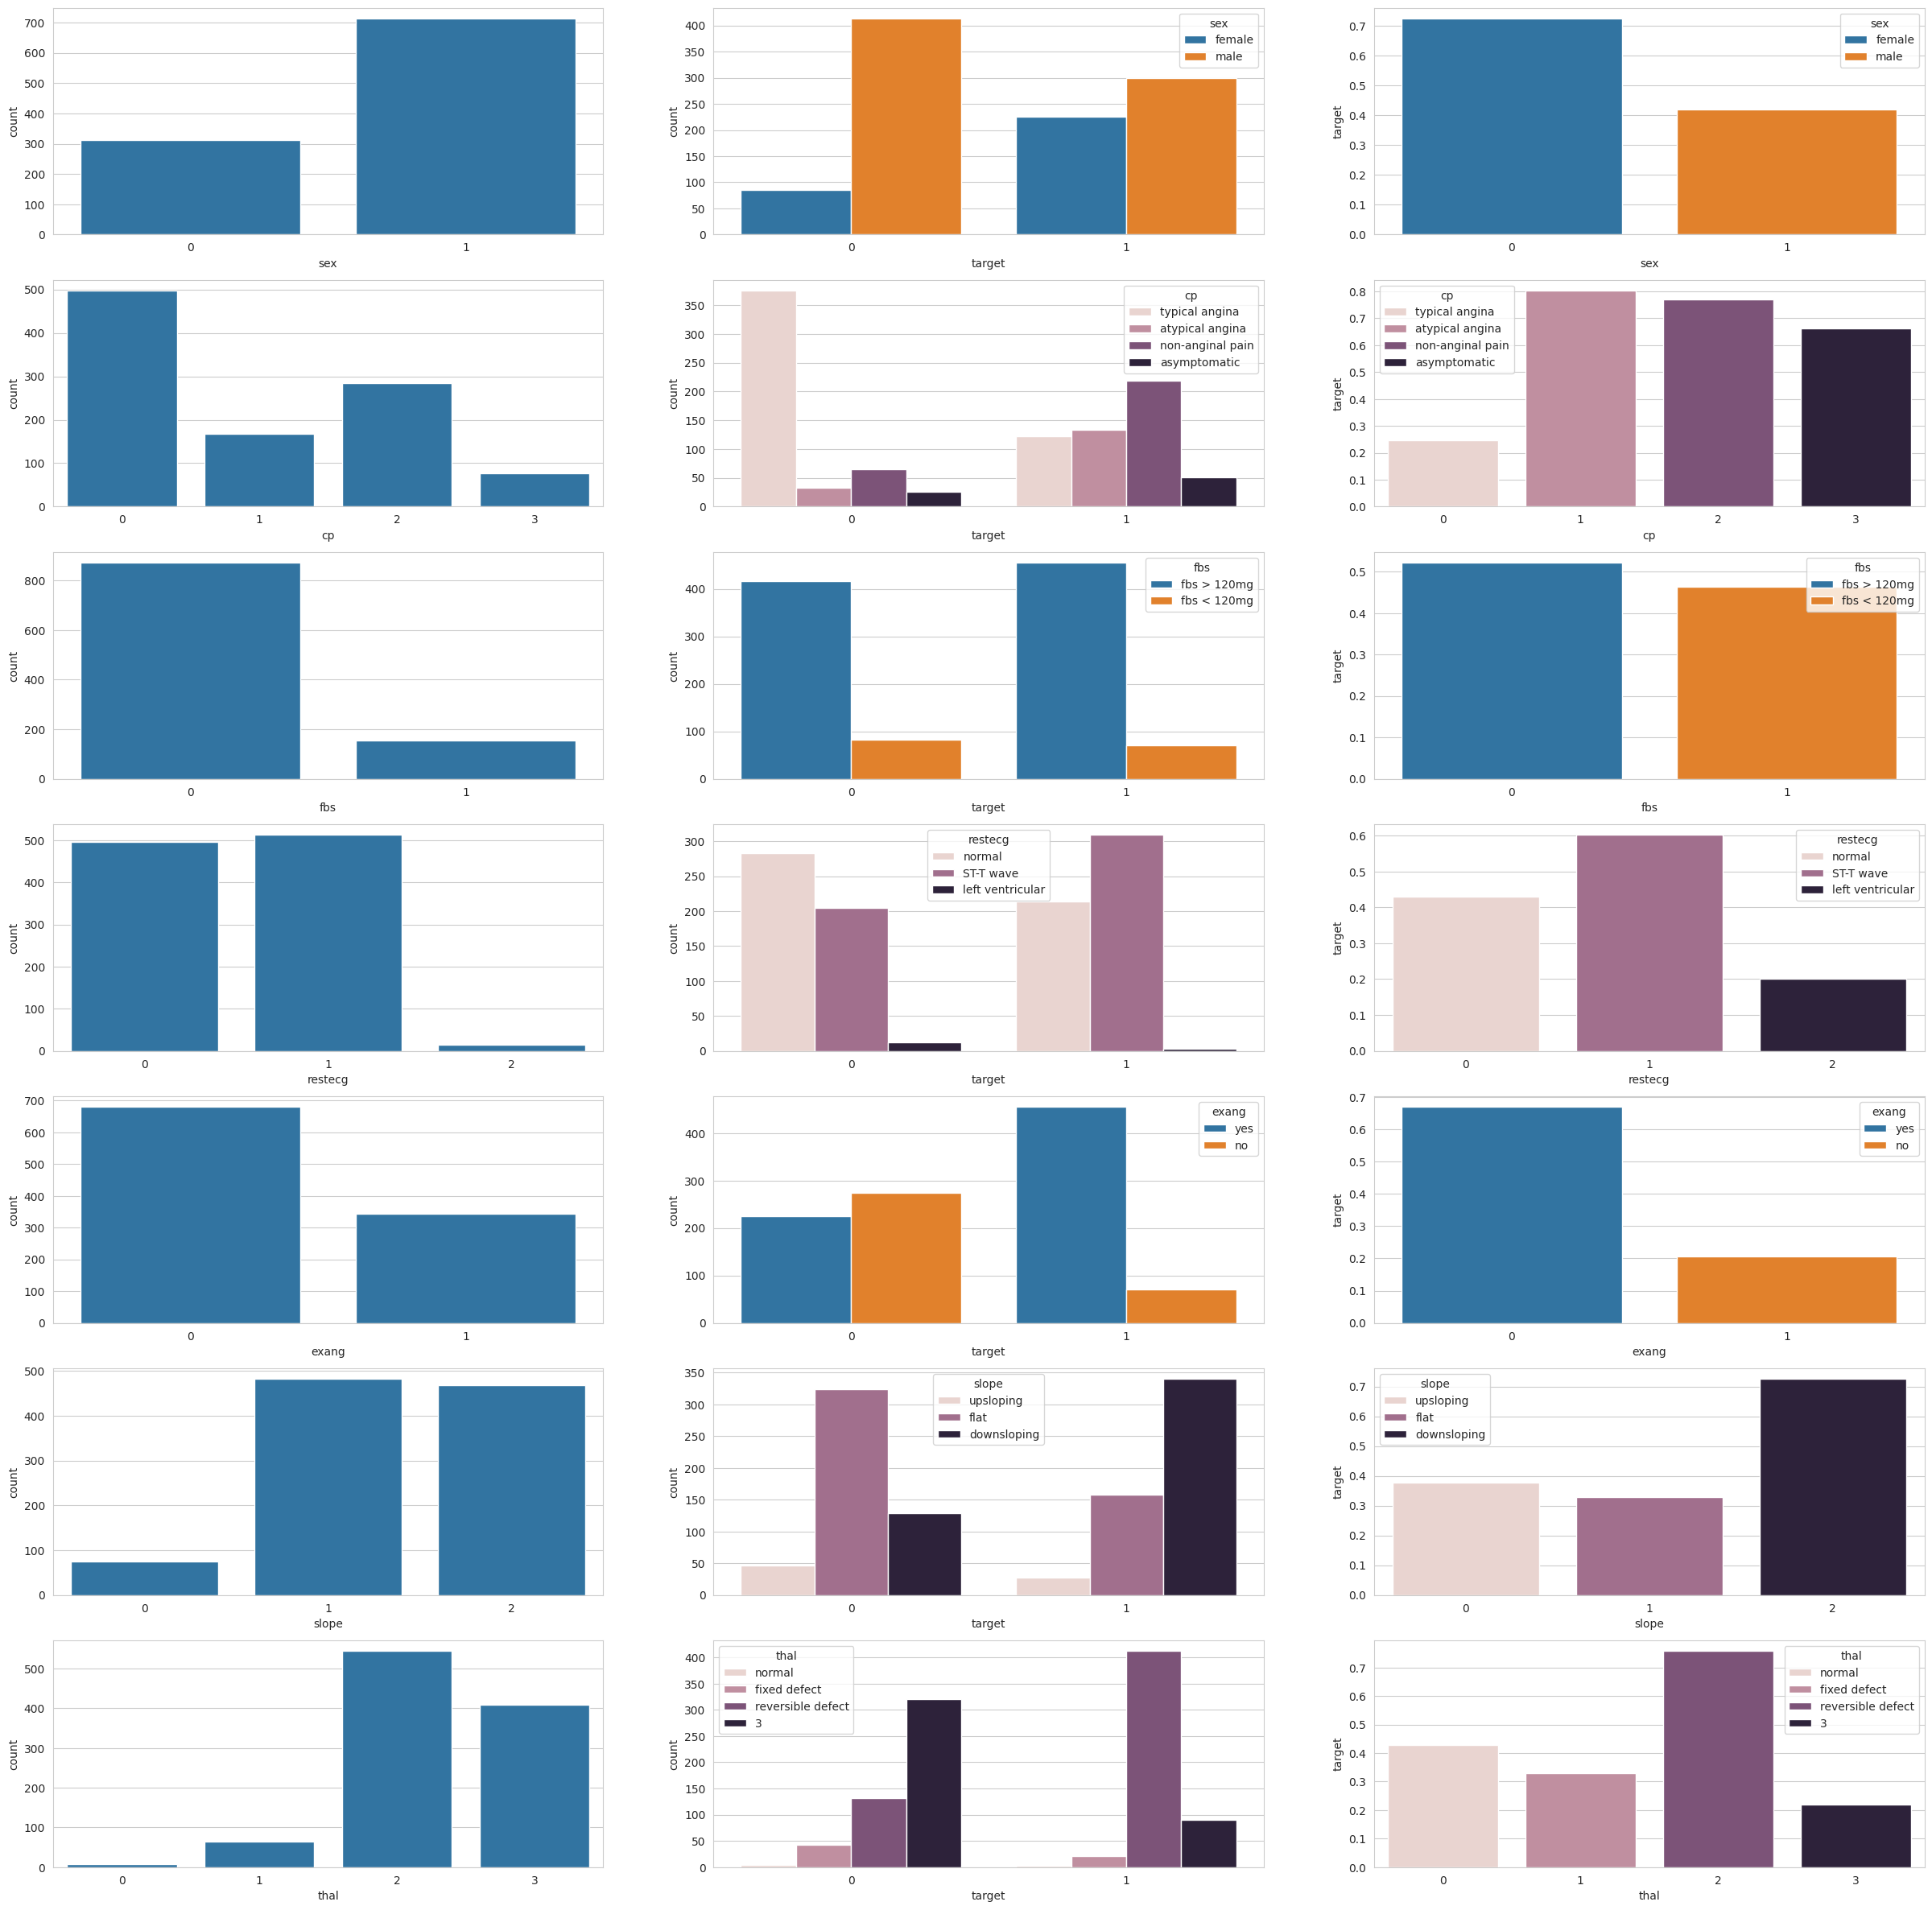

In [23]:
fig_categorial, axes = plt.subplots(nrows=len(categorial), ncols=3, figsize=(30, 30))

plotGrid(isCategorial=True)

In [24]:
continuous = [('trestbps', 'blood pressure in mm Hg'),
              ('chol', 'serum cholestoral in mg/d'),
              ('thalach', 'maximum heart rate achieved'),
              ('oldpeak', 'ST depression by exercise relative to rest'),
              ('ca', '# major vessels: (0-3) colored by flourosopy')]

In [25]:
def plotContinuous(attribute, xlabel, ax_index):
    sns.distplot(data[[attribute]], ax=axes[ax_index][0])
    axes[ax_index][0].set(xlabel=xlabel, ylabel='density')
    sns.violinplot(x='target', y=attribute, data=data, ax=axes[ax_index][1])

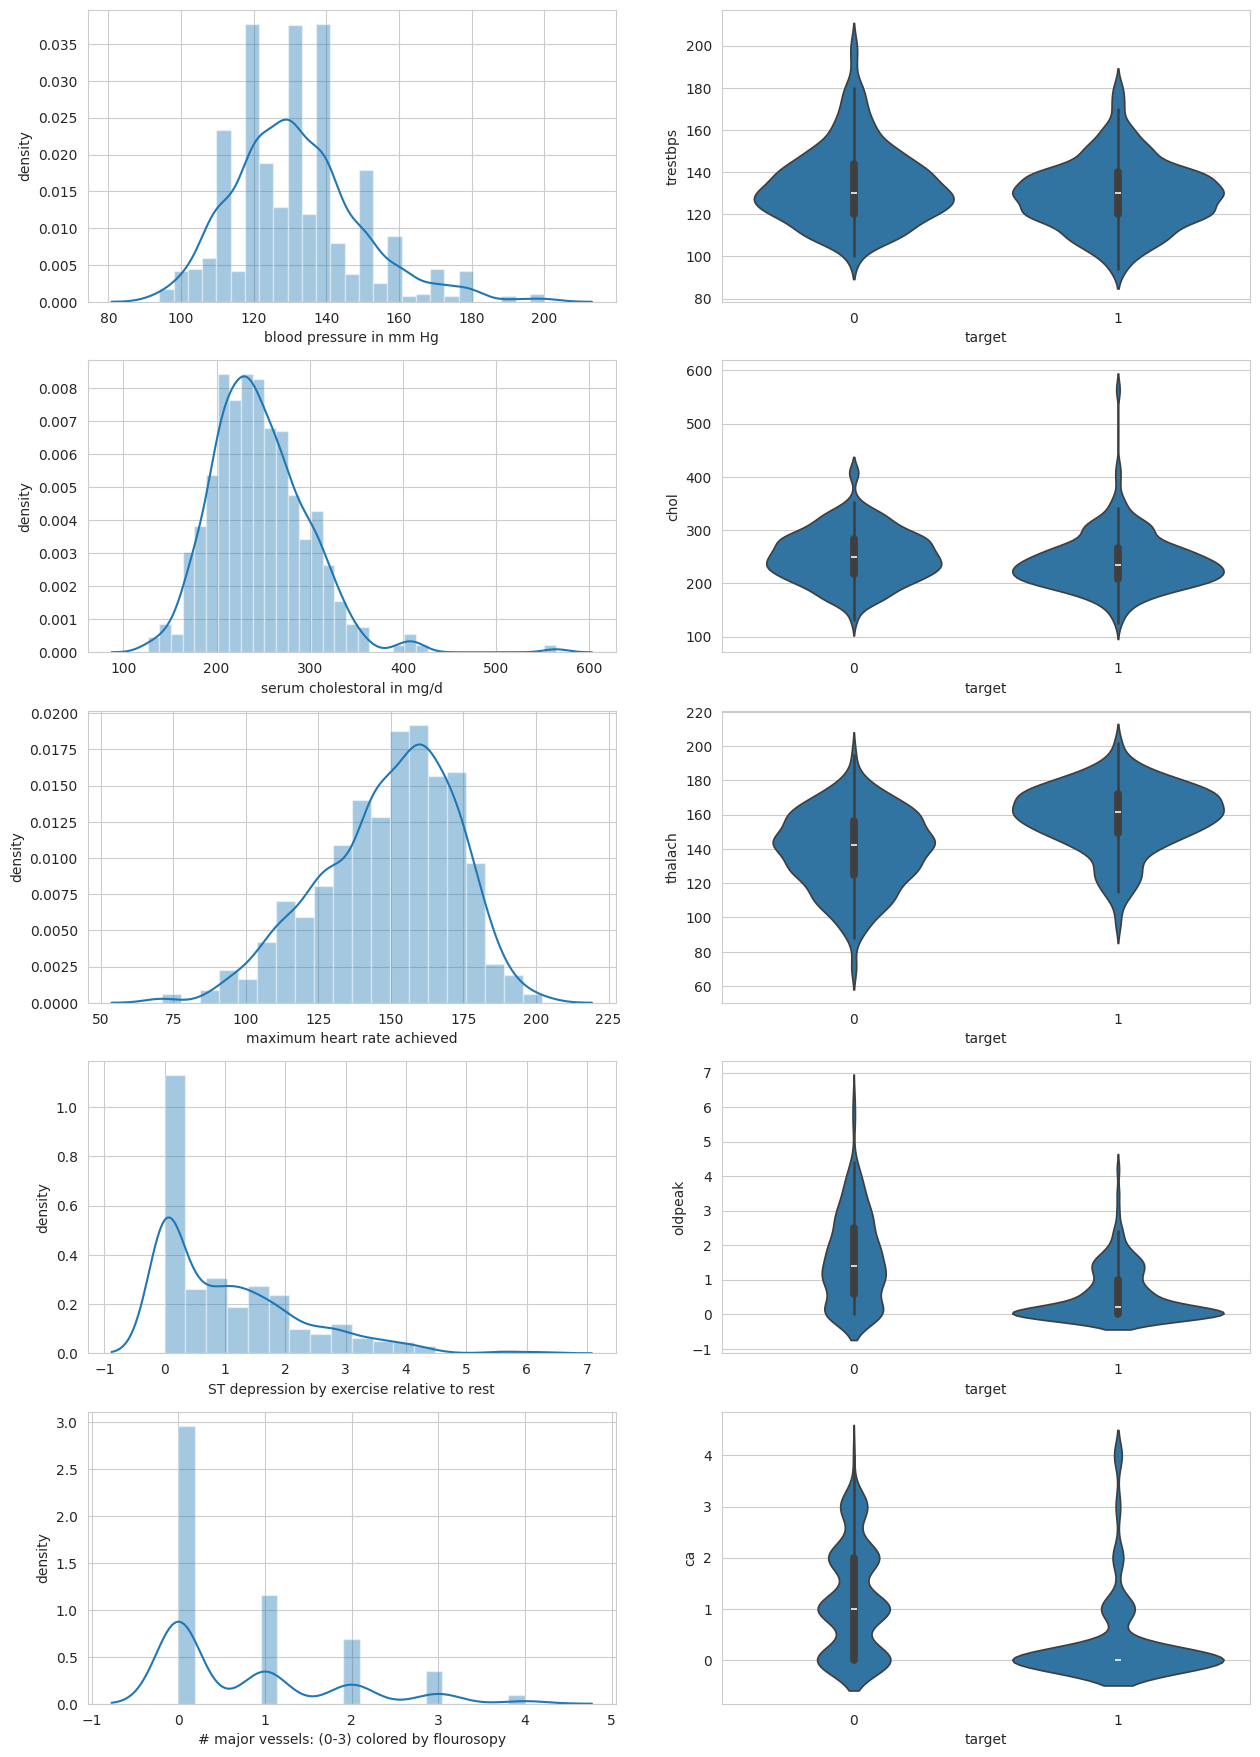

In [26]:
fig_continuous, axes = plt.subplots(nrows=len(continuous), ncols=2, figsize=(15, 22))

plotGrid(isCategorial=False)

Heart Disease Frequency for ages

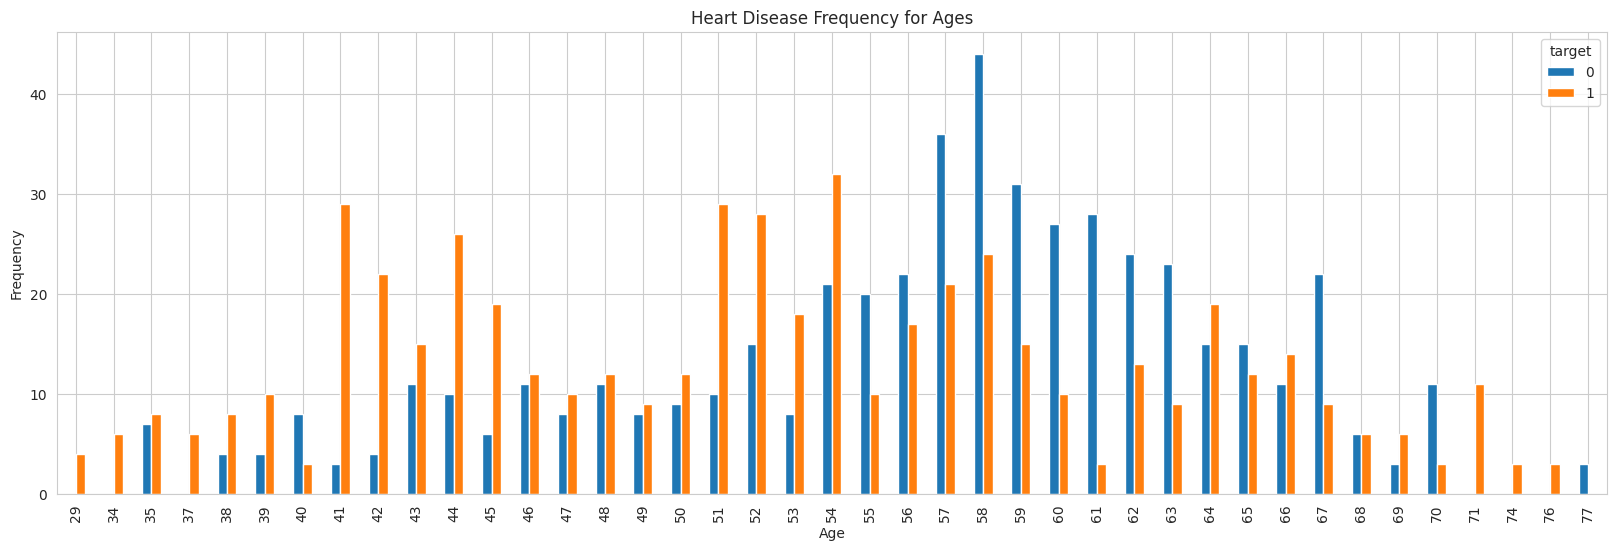

In [27]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

**Heart Disease frequency for sex**


(where 0 is female and 1 is male and "red" is have heart disease and "blue" is don't have heart disease)

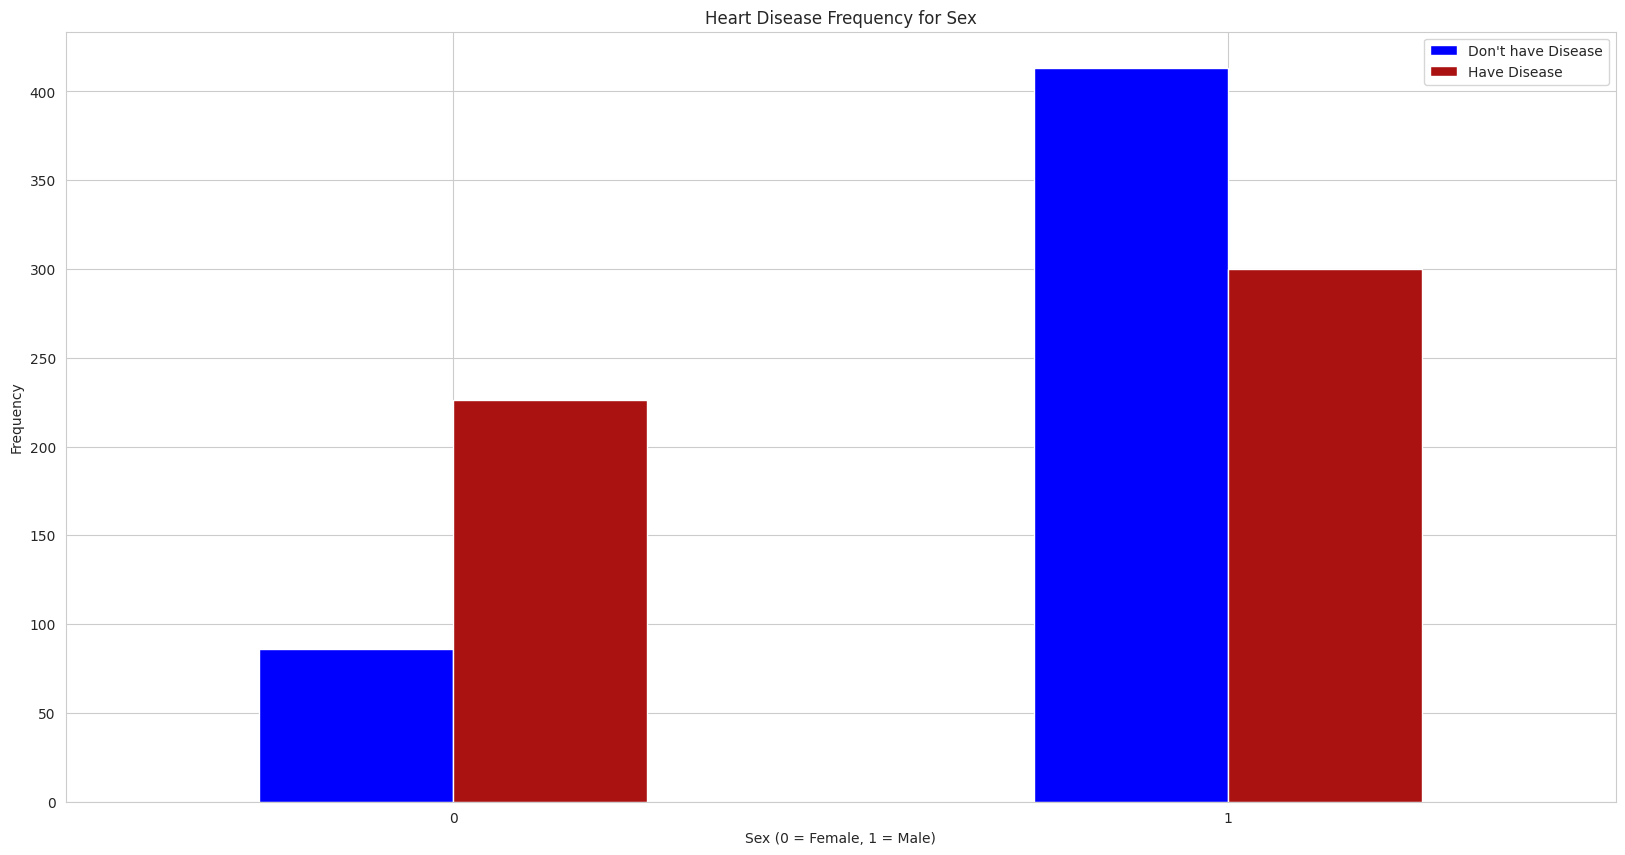

In [28]:
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(20,10),color=['blue','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Don't have Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [29]:
data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

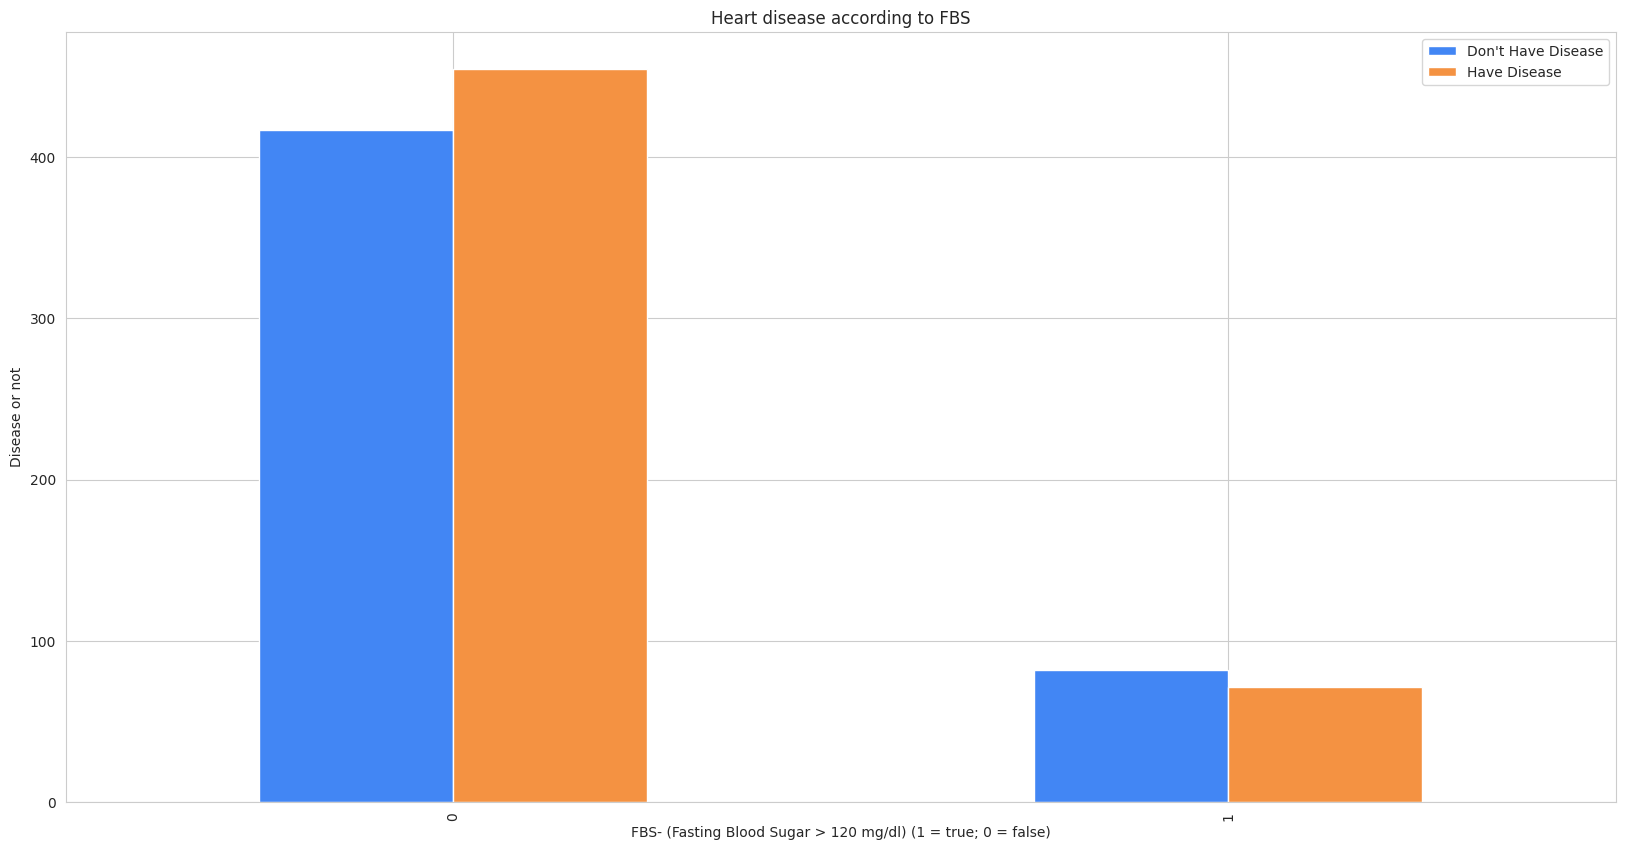

In [30]:
pd.crosstab(data.fasting_blood_sugar,data.target).plot(kind="bar",figsize=(20,10),color=['#4286f4','#f49242'])
plt.title("Heart disease according to FBS")
plt.xlabel('FBS- (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation=90)
plt.legend(["Don't Have Disease", "Have Disease"])
plt.ylabel('Disease or not')
plt.show()

Analysing The person's resting blood pressure (mm Hg on admission to the hospital)

In [31]:
data["resting_blood_pressure"].unique()

array([125, 140, 145, 148, 138, 100, 114, 160, 120, 122, 112, 132, 118,
       128, 124, 106, 104, 135, 130, 136, 180, 129, 150, 178, 146, 117,
       152, 154, 170, 134, 174, 144, 108, 123, 110, 142, 126, 192, 115,
        94, 200, 165, 102, 105, 155, 172, 164, 156, 101])

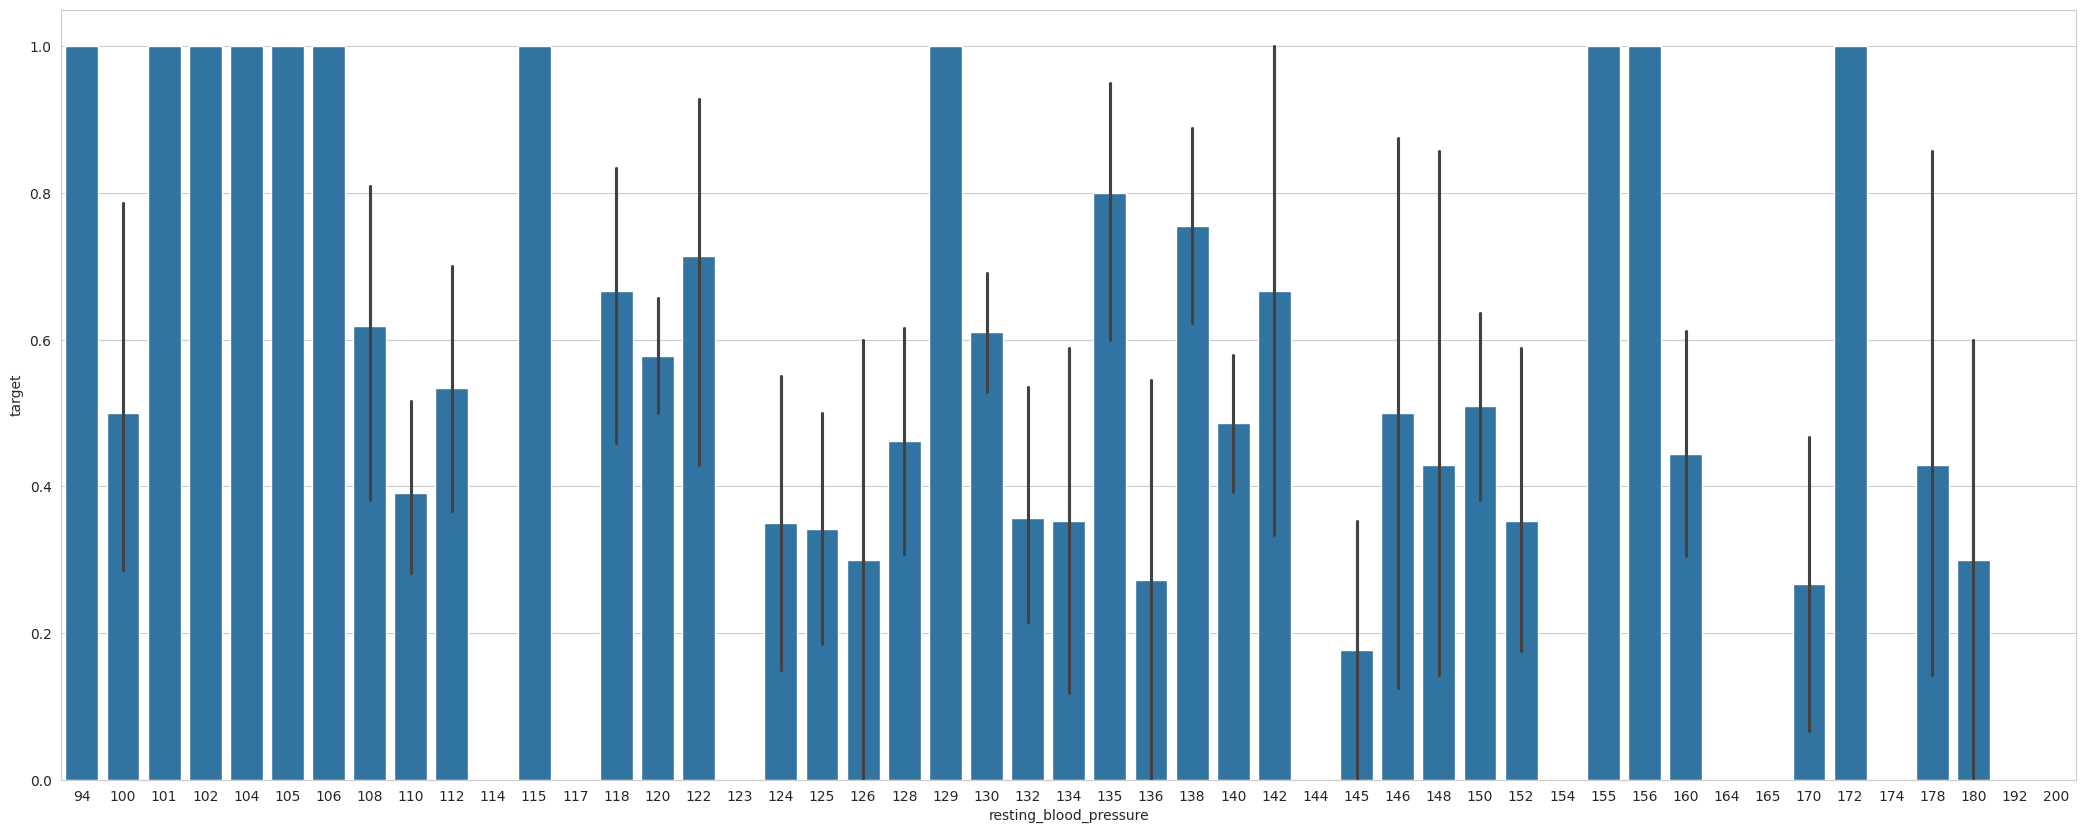

In [33]:
plt.figure(figsize=(26, 10))
sns.barplot(x=data["resting_blood_pressure"], y=data["target"]) # Assuming 'target' is the column you want to plot against resting blood pressure
plt.show()

thalassemia and cholesterol scatterplot

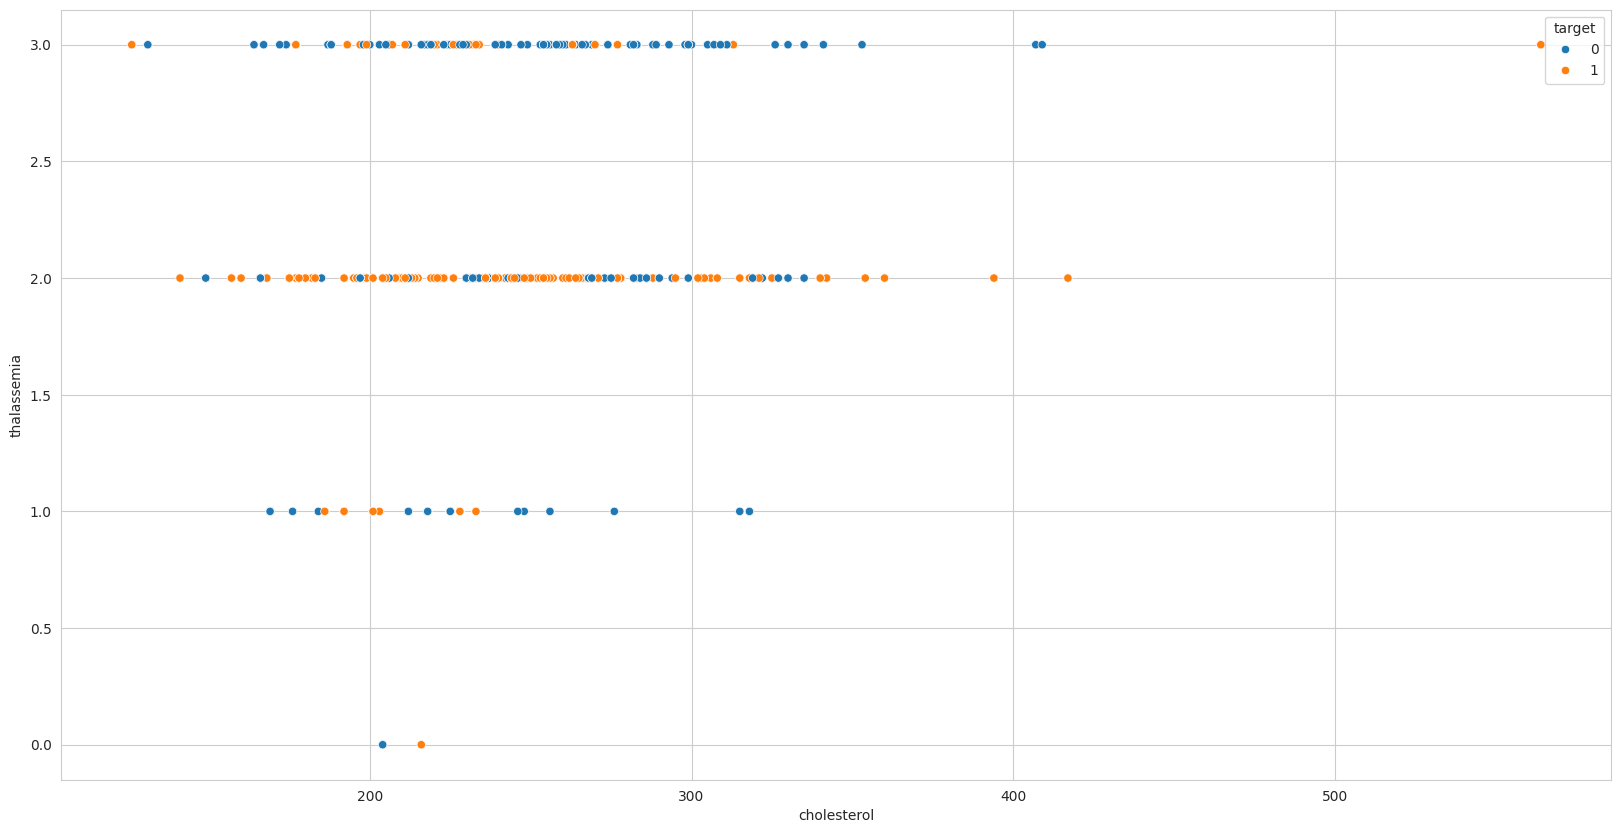

In [34]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='cholesterol',y='thalassemia',data=data,hue='target')
plt.show()

thalassemia vs resting blood pressure scatterplot

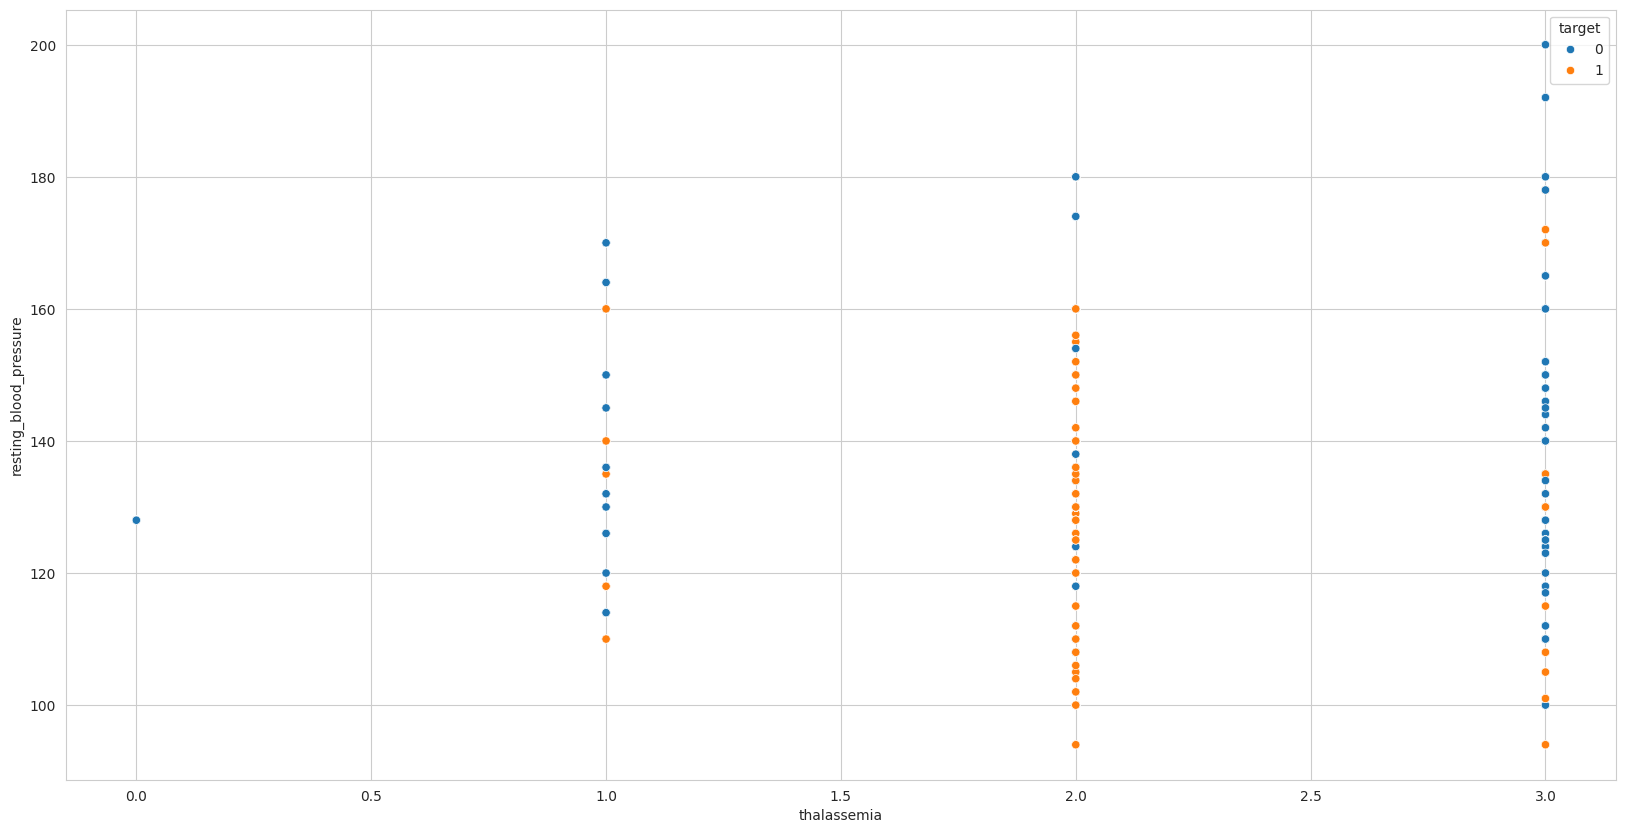

In [35]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='thalassemia',y='resting_blood_pressure',data=data,hue='target')
plt.show()

Health rate vs age

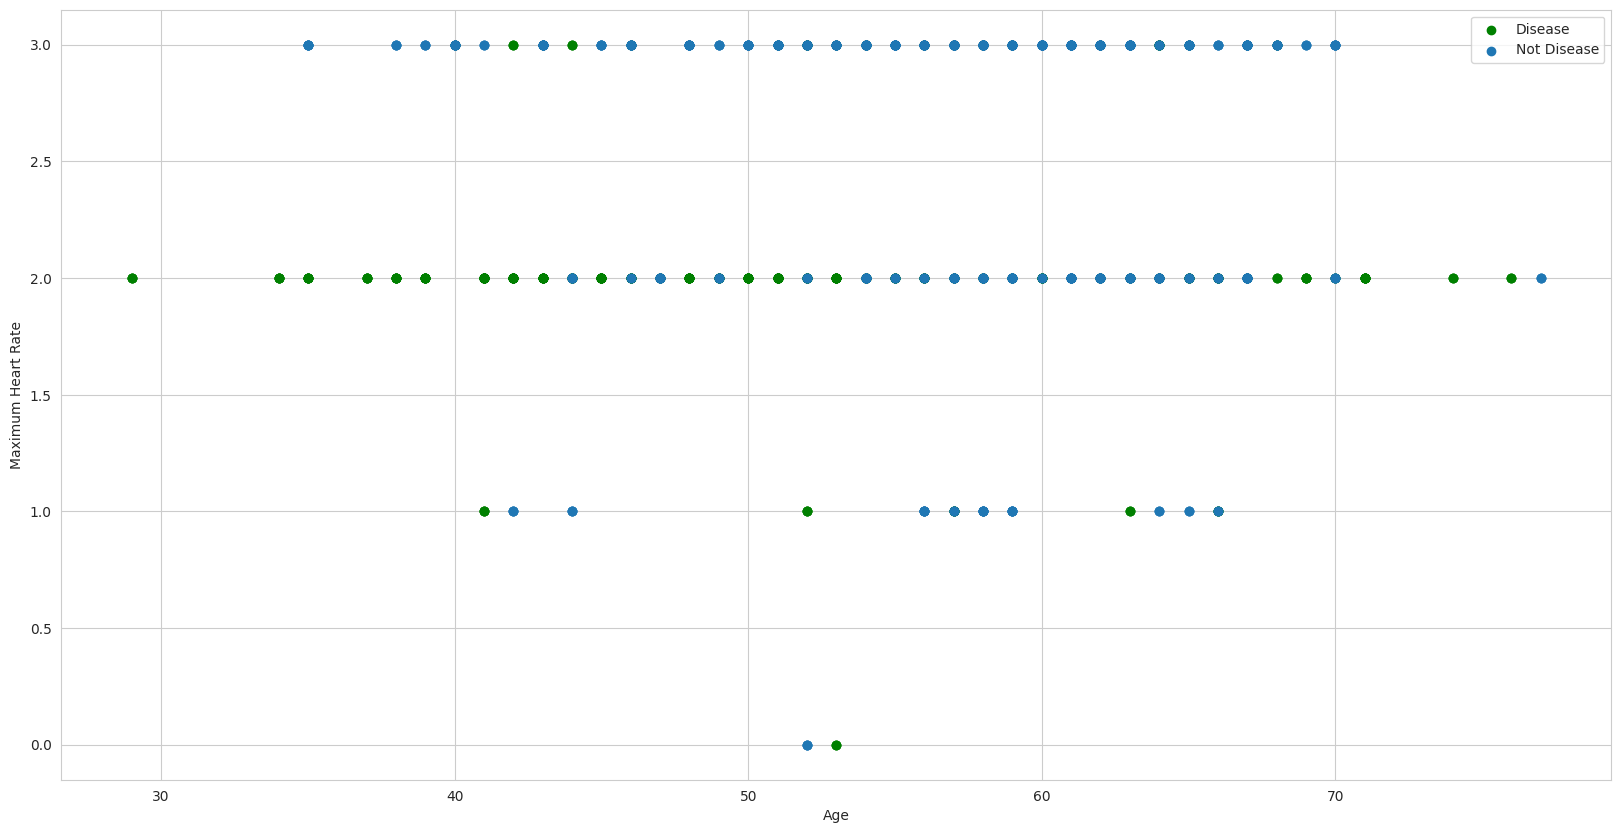

In [36]:
plt.figure(figsize=(20, 10))
plt.scatter(x=data.age[data.target==1], y=data.thalassemia[(data.target==1)], c="green")
plt.scatter(x=data.age[data.target==0], y=data.thalassemia[(data.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

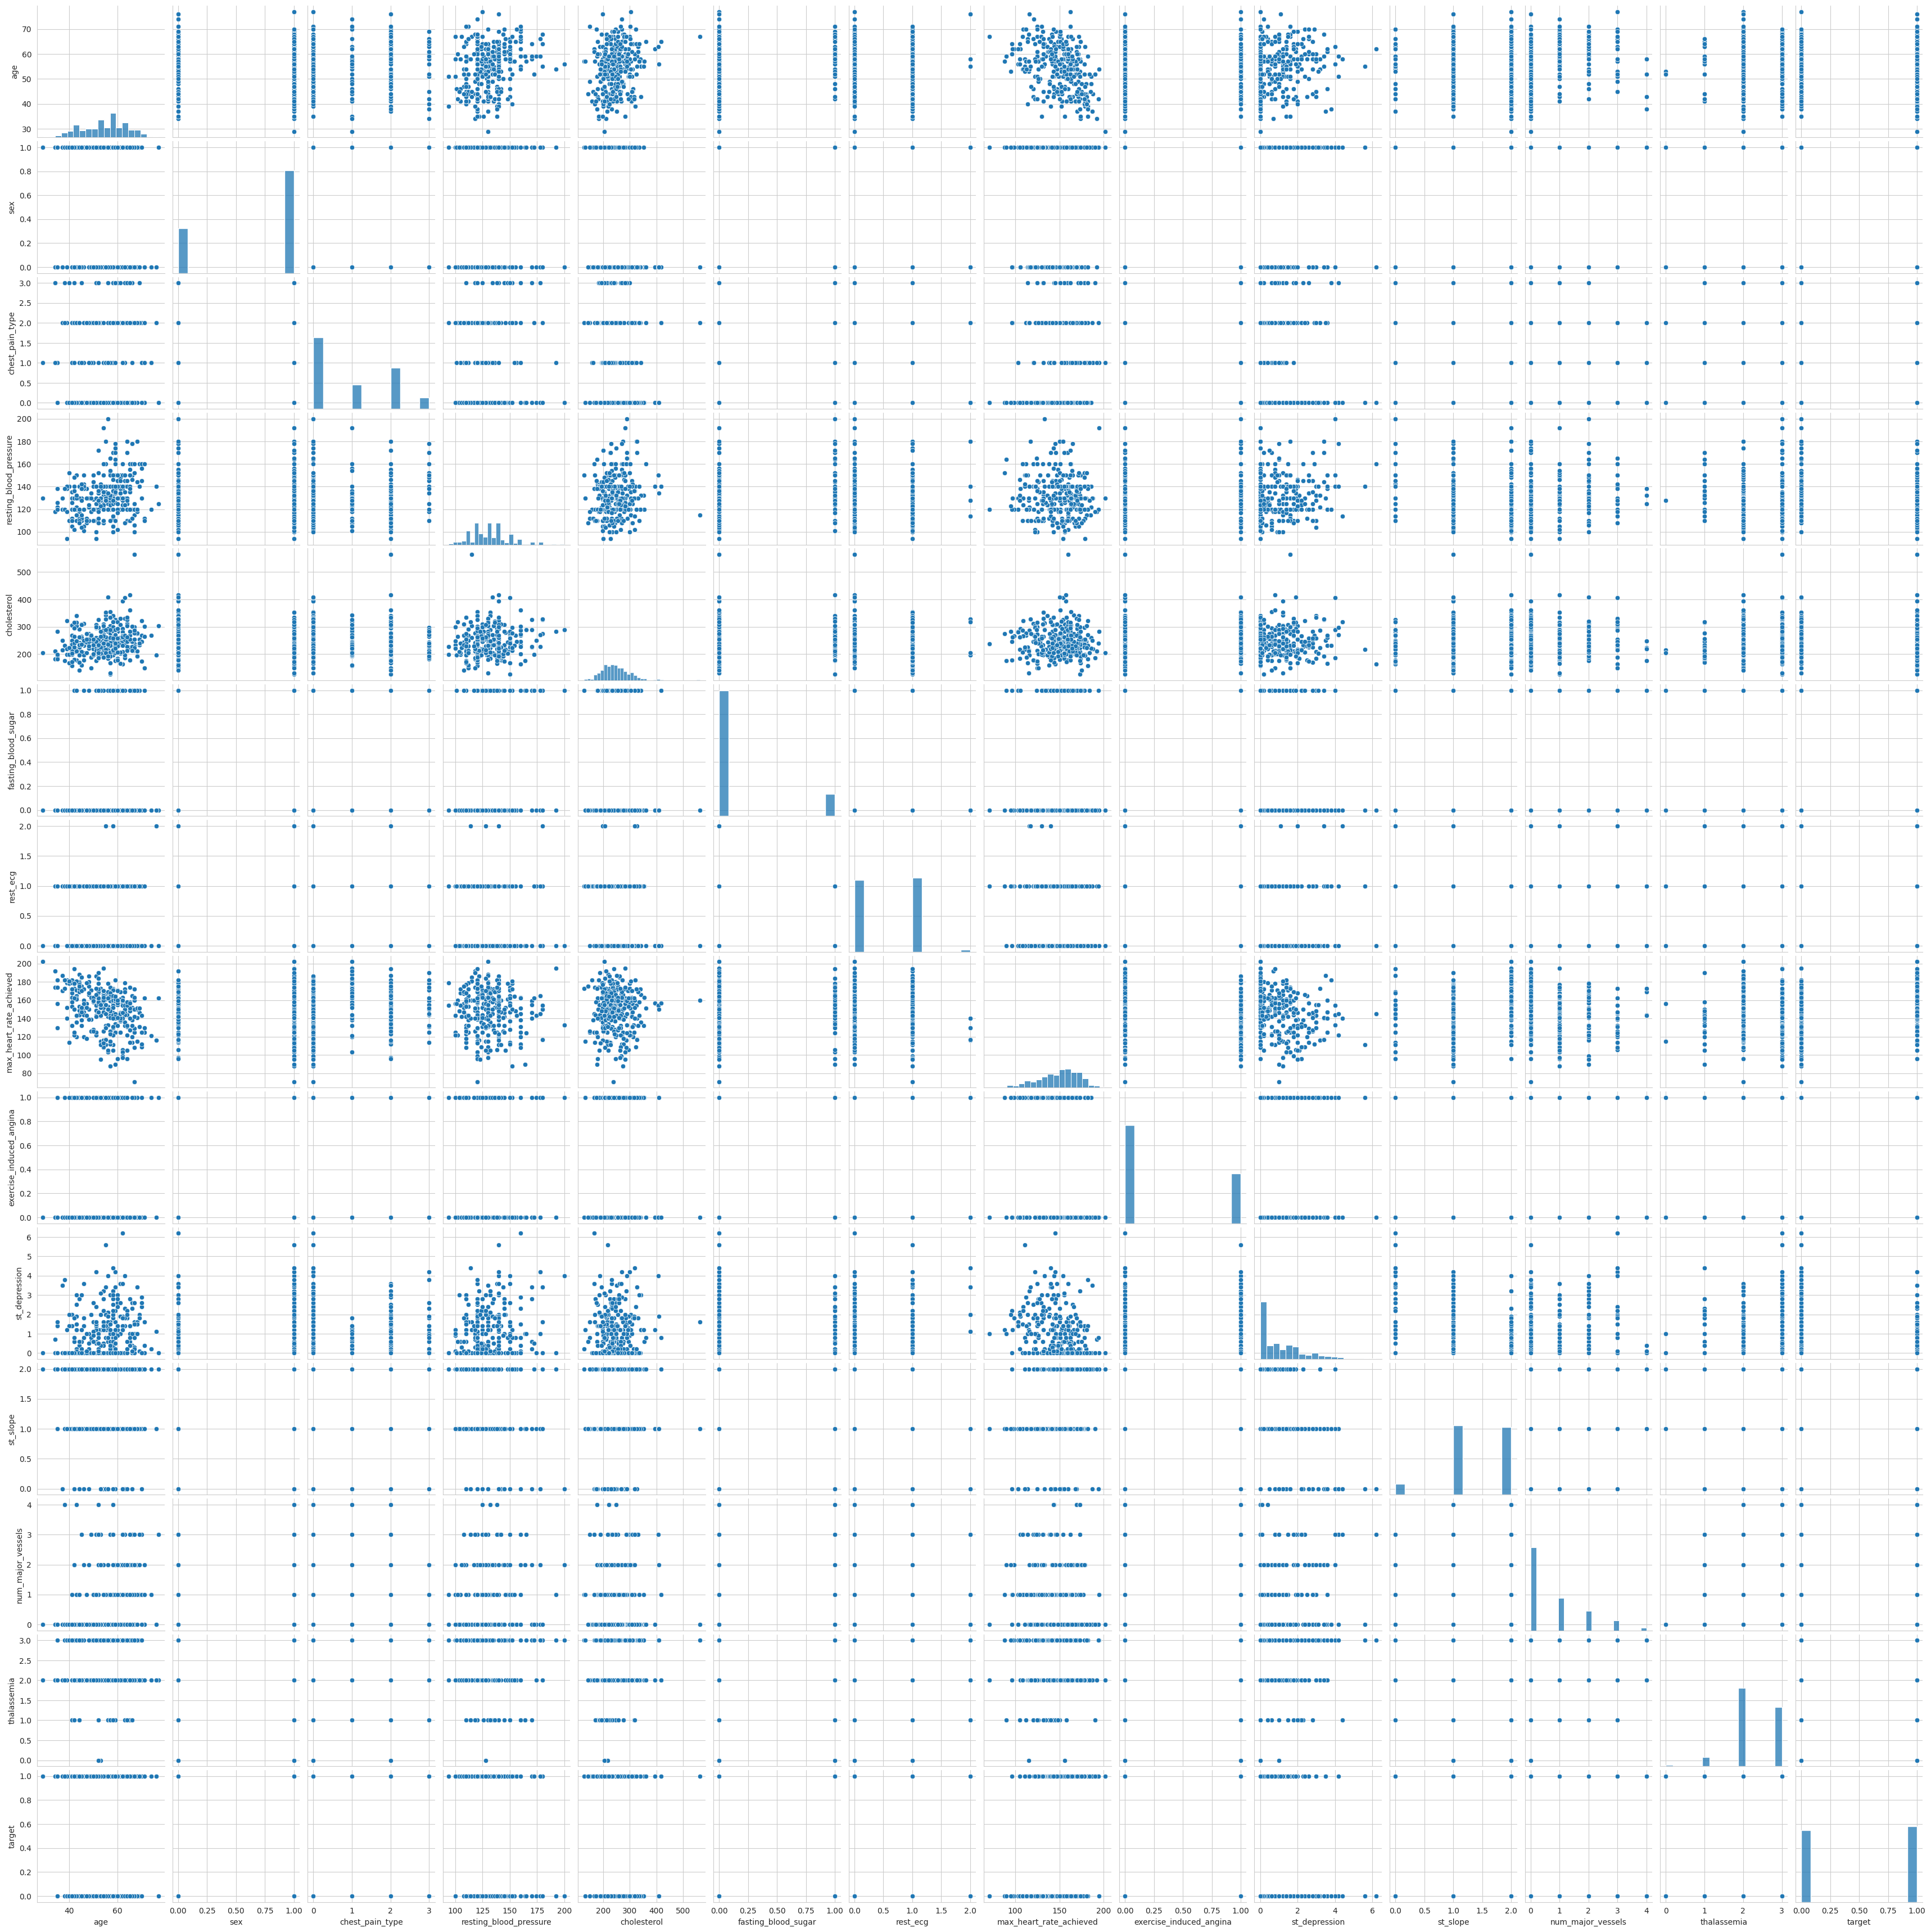

In [37]:
sns.pairplot(data=data)

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'chest_pain_type'}>,
        <Axes: title={'center': 'resting_blood_pressure'}>],
       [<Axes: title={'center': 'cholesterol'}>,
        <Axes: title={'center': 'fasting_blood_sugar'}>,
        <Axes: title={'center': 'rest_ecg'}>,
        <Axes: title={'center': 'max_heart_rate_achieved'}>],
       [<Axes: title={'center': 'exercise_induced_angina'}>,
        <Axes: title={'center': 'st_depression'}>,
        <Axes: title={'center': 'st_slope'}>,
        <Axes: title={'center': 'num_major_vessels'}>],
       [<Axes: title={'center': 'thalassemia'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

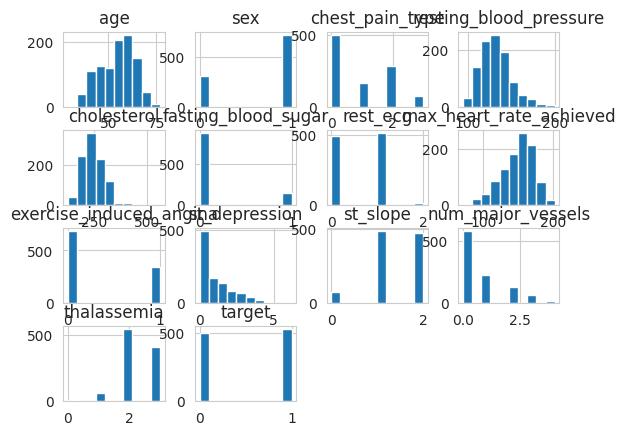

In [38]:
data.hist()

**Correlation plot**

In [39]:
# store numeric variables in cnames
cnames=['age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression','num_major_vessels']

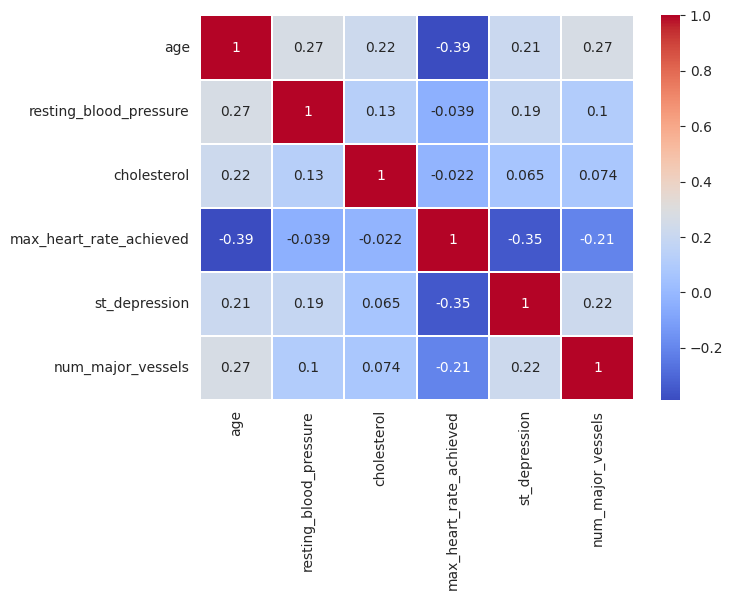

In [40]:
#Set the width and height of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Correlation plot
df_corr = data.loc[:,cnames]
#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, annot = True, cmap='coolwarm',linewidths=.1)
plt.show()

In [41]:
df_corr = data.loc[:,cnames]
df_corr

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels
0,52,125,212,168,1.0,2
1,53,140,203,155,3.1,0
2,70,145,174,125,2.6,0
3,61,148,203,161,0.0,1
4,62,138,294,106,1.9,3
...,...,...,...,...,...,...
1020,59,140,221,164,0.0,0
1021,60,125,258,141,2.8,1
1022,47,110,275,118,1.0,1
1023,50,110,254,159,0.0,0


In [42]:
print(data.corr()["target"].abs().sort_values(ascending=False))

target                     1.000000
st_depression              0.438441
exercise_induced_angina    0.438029
chest_pain_type            0.434854
max_heart_rate_achieved    0.422895
num_major_vessels          0.382085
st_slope                   0.345512
thalassemia                0.337838
sex                        0.279501
age                        0.229324
resting_blood_pressure     0.138772
rest_ecg                   0.134468
cholesterol                0.099966
fasting_blood_sugar        0.041164
Name: target, dtype: float64


This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

# <b><u>Data Pre-processing and cleaning</u></b>



> 1: Null Value Check



In [43]:
data.isnull().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64

In [44]:
print(data.isnull().sum().sum())
data = data.dropna()
print("NaN dropped")
print(data.isnull().sum().sum())

0
NaN dropped
0


In [45]:
data.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


All null values are successfully dropped



> 2. Skewness Check



In [46]:
pd.DataFrame([stats.skew(data['st_depression']),stats.skew(data['cholesterol']),stats.skew(data['target'])],index=['st_depression','cholesterol','target'],columns=['skewness'])

,skewness
st_depression,1.209127
cholesterol,1.072500
target,-0.052701


In [47]:
df_no_outliers = data

In [48]:
# Remove the outliers
data_no_outliers = data[(data < data.quantile(0.99)) & (data > data.quantile(0.01))]


In [49]:
# Transform the data
data_transformed = np.log(data)

In [50]:
# Use robust statistical methods
data_robust = data.copy()
data_robust = data_robust.apply(lambda x: x.fillna(x.median()), axis=0)

In [51]:
data.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [52]:
pd.DataFrame([stats.skew(data['st_depression']),stats.skew(data['cholesterol']),stats.skew(data['target'])],index=['st_depression','cholesterol','target'],columns=['skewness'])

,skewness
st_depression,1.209127
cholesterol,1.072500
target,-0.052701




```
There were NULL values which were dropped from the dataset.

Outliers handling and Skewed data redressal is handled above.  
```



> To apply Feature engineering:<br>
a) Feature Subset Selection:</b><br/>
Drop irrelevent features:
</br>fasting_blood_sugar: Coreleation analysis shows that fbs is least releated


In [53]:
data=data.drop("fasting_blood_sugar",axis=1)
data.info()
data.describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1025 non-null   int64  
 1   sex                      1025 non-null   int64  
 2   chest_pain_type          1025 non-null   int64  
 3   resting_blood_pressure   1025 non-null   int64  
 4   cholesterol              1025 non-null   int64  
 5   rest_ecg                 1025 non-null   int64  
 6   max_heart_rate_achieved  1025 non-null   int64  
 7   exercise_induced_angina  1025 non-null   int64  
 8   st_depression            1025 non-null   float64
 9   st_slope                 1025 non-null   int64  
 10  num_major_vessels        1025 non-null   int64  
 11  thalassemia              1025 non-null   int64  
 12  target                   1025 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 104.2 KB


<bound method NDFrame.describe of       age  sex  chest_pain_type  resting_blood_pressure  cholesterol  \
0      52    1                0                     125          212   
1      53    1                0                     140          203   
2      70    1                0                     145          174   
3      61    1                0                     148          203   
4      62    0                0                     138          294   
...   ...  ...              ...                     ...          ...   
1020   59    1                1                     140          221   
1021   60    1                0                     125          258   
1022   47    1                0                     110          275   
1023   50    0                0                     110          254   
1024   54    1                0                     120          188   

      rest_ecg  max_heart_rate_achieved  exercise_induced_angina  \
0            1                      168                        0   
1            0                      155                        1   
2            1                      125                        1   
3            1                      161                        0   
4            1                      106                        0   
...        ...                      ...                      ...   
1020         1                      164                        1   
1021         0                      141                        1   
1022         0                      118                        1   
1023         0                      159                        0   
1024         1                      113                        0   

      st_depression  st_slope  num_major_vessels  thalassemia  target  
0               1.0         2                  2            3       0  
1               3.1         0                  0            3       0  
2               2.6         0                  0            3       0  
3               0.0         2                  1            3       0  
4               1.9         1                  3            2       0  
...             ...       ...                ...          ...     ...  
1020            0.0         2                  0            2       1  
1021            2.8         1                  1            3       0  
1022            1.0         1                  1            2       0  
1023            0.0         2                  0            2       1  
1024            1.4         1                  1            3       0  

[1025 rows x 13 columns]>

In [54]:
print(data.corr()["target"].abs().sort_values(ascending=False))


target                     1.000000
st_depression              0.438441
exercise_induced_angina    0.438029
chest_pain_type            0.434854
max_heart_rate_achieved    0.422895
num_major_vessels          0.382085
st_slope                   0.345512
thalassemia                0.337838
sex                        0.279501
age                        0.229324
resting_blood_pressure     0.138772
rest_ecg                   0.134468
cholesterol                0.099966
Name: target, dtype: float64




```
Data is normalized as we can see above
```



In [55]:
from sklearn.preprocessing import MinMaxScaler
# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the dataframe
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [56]:
data.describe

<bound method NDFrame.describe of            age  sex  chest_pain_type  resting_blood_pressure  cholesterol  \
0     0.479167  1.0         0.000000                0.292453     0.196347   
1     0.500000  1.0         0.000000                0.433962     0.175799   
2     0.854167  1.0         0.000000                0.481132     0.109589   
3     0.666667  1.0         0.000000                0.509434     0.175799   
4     0.687500  0.0         0.000000                0.415094     0.383562   
...        ...  ...              ...                     ...          ...   
1020  0.625000  1.0         0.333333                0.433962     0.216895   
1021  0.645833  1.0         0.000000                0.292453     0.301370   
1022  0.375000  1.0         0.000000                0.150943     0.340183   
1023  0.437500  0.0         0.000000                0.150943     0.292237   
1024  0.520833  1.0         0.000000                0.245283     0.141553   

      rest_ecg  max_heart_rate_achieved  exercise_induced_angina  \
0          0.5                 0.740458                      0.0   
1          0.0                 0.641221                      1.0   
2          0.5                 0.412214                      1.0   
3          0.5                 0.687023                      0.0   
4          0.5                 0.267176                      0.0   
...        ...                      ...                      ...   
1020       0.5                 0.709924                      1.0   
1021       0.0                 0.534351                      1.0   
1022       0.0                 0.358779                      1.0   
1023       0.0                 0.671756                      0.0   
1024       0.5                 0.320611                      0.0   

      st_depression  st_slope  num_major_vessels  thalassemia  target  
0          0.161290       1.0               0.50     1.000000     0.0  
1          0.500000       0.0               0.00     1.000000     0.0  
2          0.419355       0.0               0.00     1.000000     0.0  
3          0.000000       1.0               0.25     1.000000     0.0  
4          0.306452       0.5               0.75     0.666667     0.0  
...             ...       ...                ...          ...     ...  
1020       0.000000       1.0               0.00     0.666667     1.0  
1021       0.451613       0.5               0.25     1.000000     0.0  
1022       0.161290       0.5               0.25     0.666667     0.0  
1023       0.000000       1.0               0.00     0.666667     1.0  
1024       0.225806       0.5               0.25     1.000000     0.0  

[1025 rows x 13 columns]>

Data is normalised

# <b><u> Model Building and Performance Evaluation
</u></b>

<b>1. Split the dataset into training and test sets.
</br>
>Case 1 : Train = 80 % Test = 20% </br>[ x_train1,y_train1] = 80% ;
[ x_test1,y_test1] = 20% ;
</br>
>Case 2 : Train = 10 % Test = 90% </br>[ x_train2,y_train2] = 10% ;
[ x_test2,y_test2] = 90% </b>




```
Importing required libraries
```



In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import neighbors
from math import sqrt
from sklearn import metrics

> Case 1 : Train = 80 % Test = 20% </br>[ x_train1,y_train1] = 80% ;
[ x_test1,y_test1] = 20% ;
</br>

In [58]:
from sklearn.model_selection import train_test_split

predictors = data.drop("target",axis=1)
target = data["target"]

X_train1,X_test1,Y_train1,Y_test1 = train_test_split(predictors,target,test_size=0.20,random_state=0)
print("Training features have {0} records and Testing features have {1} records.".\
      format(X_train1.shape[0], X_test1.shape[0]))

Training features have 820 records and Testing features have 205 records.


In [59]:
print(X_train1.shape)
print(X_test1.shape)
print(Y_train1.shape)
print(Y_test1.shape)

(820, 12)
(205, 12)
(820,)
(205,)


>Case 2 : Train = 10 % Test = 90% </br>[ x_train2,y_train2] = 10% ;
[ x_test2,y_test2] = 90%

In [60]:
from sklearn.model_selection import train_test_split

predictors = data.drop("target",axis=1)
target = data["target"]

X_train2,X_test2,Y_train2,Y_test2 = train_test_split(predictors,target,test_size=0.90,random_state=0)
print("Training features have {0} records and Testing features have {1} records.".\
      format(X_train2.shape[0], X_test2.shape[0]))

Training features have 102 records and Testing features have 923 records.


In [61]:
print(X_train2.shape)
print(X_test2.shape)
print(Y_train2.shape)
print(Y_test2.shape)

(102, 12)
(923, 12)
(102,)
(923,)


 **Random Forest**

Fold : 1

In [62]:
from sklearn.ensemble import RandomForestClassifier
randfor = RandomForestClassifier(n_estimators=100, random_state=0)

randfor.fit(X_train1, Y_train1)

y_pred_rf1 = randfor.predict(X_test1)
print(y_pred_rf1)

[1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1.
 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0.
 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1.
 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0.
 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1.
 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1.]


Learning curve for Training score & cross validation score

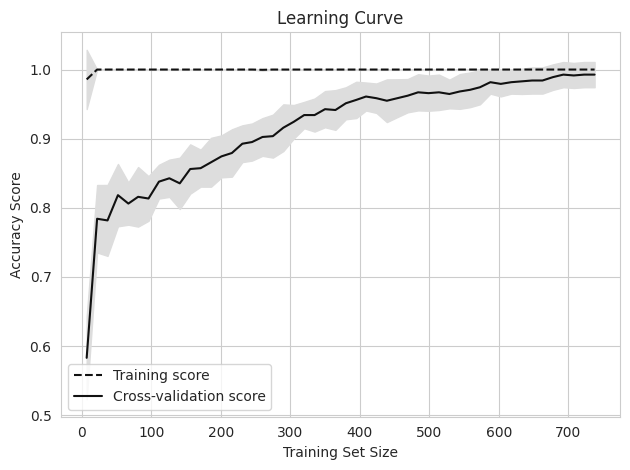

In [63]:
from sklearn.model_selection import learning_curve
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(),
                                                        X_train1,
                                                        Y_train1,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1,
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()


In [66]:
score_rf1 = round(accuracy_score(y_pred_rf1,Y_test1)*100,2)

print("The accuracy score achieved using Random Forest is: "+str(score_rf1)+" %")

The accuracy score achieved using Random Forest is: 100.0 %


In [67]:
#Random forest with 100 trees
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train1, Y_train1)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train1, Y_train1)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test1, Y_test1)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


Pruneing the data and checking accuracy

In [68]:
rf1 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf1.fit(X_train1, Y_train1)
print("Accuracy on training set: {:.3f}".format(rf1.score(X_train1, Y_train1)))
print("Accuracy on test set: {:.3f}".format(rf1.score(X_test1, Y_test1)))

Accuracy on training set: 0.871
Accuracy on test set: 0.907


In [69]:
matrix1= confusion_matrix(Y_test1, y_pred_rf1)

<Axes: >

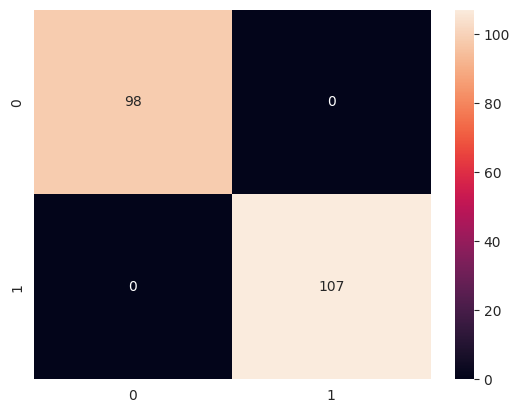

In [70]:
sns.heatmap(matrix1,annot = True, fmt = "d")

Precision score, Recall score, F-score:

In [71]:
precision1 = precision_score(Y_test1, y_pred_rf1)
print("Precision: ",precision1)

Precision:  1.0


In [72]:
recall1 = recall_score(Y_test1, y_pred_rf1)
print("Recall is: ",recall1)

Recall is:  1.0


In [73]:
print("F-Score:",(2*precision1*recall1)/(precision1+recall1))

F-Score: 1.0


False negative rate of the model

In [74]:
CM =pd.crosstab(Y_test1, y_pred_rf1)
CM
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]
TP=CM.iloc[1,1]

In [75]:
fnr=FN*100/(FN+TP)
fnr

0.0

Fold 2

In [76]:
from sklearn.ensemble import RandomForestClassifier
randfor = RandomForestClassifier(n_estimators=100, random_state=0)

randfor.fit(X_train2, Y_train2)

y_pred_rf2 = randfor.predict(X_test2)
print(y_pred_rf2)

[1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0.
 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0.
 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1.
 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0.
 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1.
 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0.
 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0.

Learning curve for Training score & cross validation score

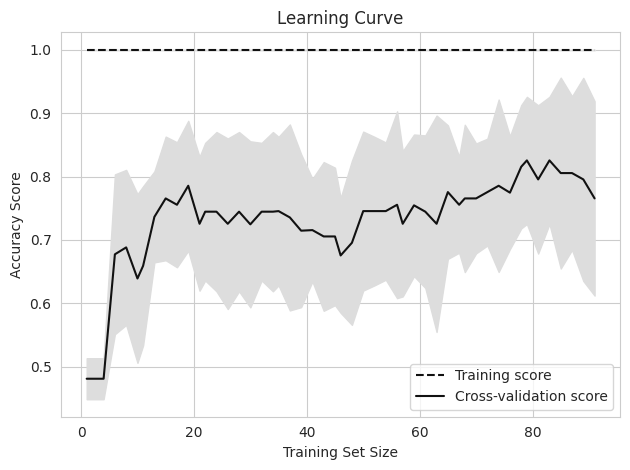

In [77]:
from sklearn.model_selection import learning_curve
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(),
                                                        X_train2,
                                                        Y_train2,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1,
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()


In [78]:
score_rf2 = round(accuracy_score(y_pred_rf2,Y_test2)*100,2)

print("The accuracy score achieved using Random Forest is: "+str(score_rf2)+" %")

The accuracy score achieved using Random Forest is: 85.81 %


In [79]:
#Random forest with 100 trees
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train2, Y_train2)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train2, Y_train2)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test2, Y_test2)))

Accuracy on training set: 1.000
Accuracy on test set: 0.858


Pruneing the data and checking accuracy

In [80]:
rf1 = RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0)
rf1.fit(X_train2, Y_train2)
print("Accuracy on training set: {:.3f}".format(rf1.score(X_train2, Y_train2)))
print("Accuracy on test set: {:.3f}".format(rf1.score(X_test2, Y_test2)))

Accuracy on training set: 0.882
Accuracy on test set: 0.846


Confusion Matrix

<Axes: >

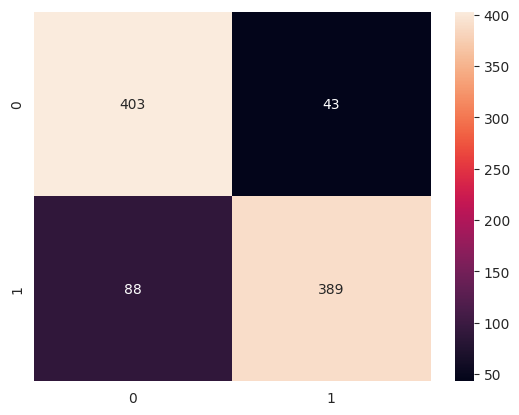

In [81]:
sns.heatmap(confusion_matrix(Y_test2, y_pred_rf2),annot = True, fmt = "d")

Precision score, Recall score, F-score:

In [82]:
precision2 = precision_score(Y_test2, y_pred_rf2)
print("Precision: ",precision2)

Precision:  0.9004629629629629


In [83]:
recall2 = recall_score(Y_test2, y_pred_rf2)
print("Recall is: ",recall2)

Recall is:  0.8155136268343816


In [84]:
print("F-Score:",(2*precision2*recall2)/(precision2+recall2))

F-Score: 0.8558855885588559


False negative rate of the model

In [85]:
CM1 =pd.crosstab(Y_test2, y_pred_rf2)
CM1
TN1=CM1.iloc[0,0]
FP1=CM1.iloc[0,1]
FN1=CM1.iloc[1,0]
TP1=CM1.iloc[1,1]

In [86]:
fnr1=FN1*100/(FN1+TP1)
fnr1

18.448637316561843

As we can see the best parameter is with fold 1

**KNN**

In [87]:
def train_model(X_train, y_train, X_test, y_test, classifier, **kwargs):

    # instantiate model
    model = classifier(**kwargs)

    # train model
    model.fit(X_train,y_train)

    # check accuracy and print out the results
    fit_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)

    print(f"Train accuracy: {fit_accuracy:0.2%}")
    print(f"Test accuracy: {test_accuracy:0.2%}")

    return model

Fold : 1

In [88]:
from sklearn.neighbors import KNeighborsClassifier
knn = train_model(X_train1, Y_train1, X_test1, Y_test1, KNeighborsClassifier, n_neighbors=8)

knn.fit(X_train1, Y_train1)

y_pred_knn3 = knn.predict(X_test1)
print(y_pred_knn3)

Train accuracy: 89.27%
Test accuracy: 89.27%
[1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0.
 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1.
 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0.
 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1.
 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1.]


In [89]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train1, Y_train1)
    knn_scores.append(knn_classifier.score(X_test1, Y_test1))

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

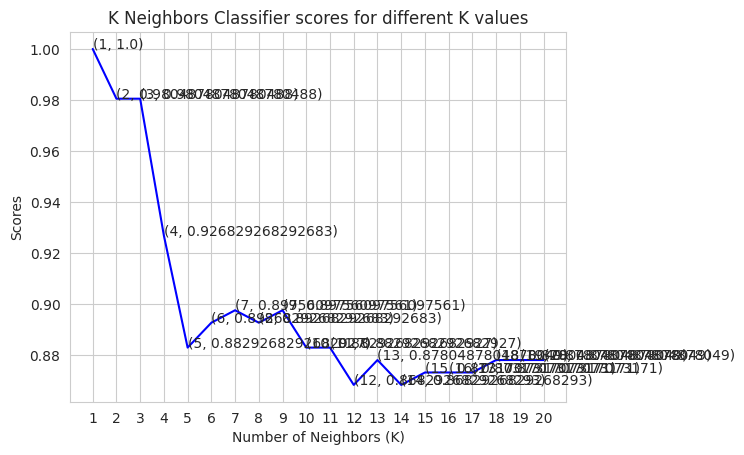

In [90]:
plt.plot([k for k in range(1, 21)], knn_scores,color = 'blue')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [91]:
knn_scores

[1.0,
 0.9804878048780488,
 0.9804878048780488,
 0.926829268292683,
 0.8829268292682927,
 0.8926829268292683,
 0.8975609756097561,
 0.8926829268292683,
 0.8975609756097561,
 0.8829268292682927,
 0.8829268292682927,
 0.8682926829268293,
 0.8780487804878049,
 0.8682926829268293,
 0.8731707317073171,
 0.8731707317073171,
 0.8731707317073171,
 0.8780487804878049,
 0.8780487804878049,
 0.8780487804878049]

In [92]:
score_knn3 = round(accuracy_score(y_pred_knn3,Y_test1)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn3)+" %")

The accuracy score achieved using KNN is: 89.27 %


In [93]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
model = train_model(X_train1, Y_train1, X_test1, Y_test1, KNeighborsClassifier)

Train accuracy: 95.61%
Test accuracy: 88.29%


In [94]:
# Seek optimal 'n_neighbours' parameter
for i in range(1,10):
    print("n_neigbors = "+str(i))
    train_model(X_train1, Y_train1, X_test1, Y_test1, KNeighborsClassifier, n_neighbors=i)

n_neigbors = 1
Train accuracy: 100.00%
Test accuracy: 100.00%
n_neigbors = 2
Train accuracy: 99.76%
Test accuracy: 98.05%
n_neigbors = 3
Train accuracy: 99.76%
Test accuracy: 98.05%
n_neigbors = 4
Train accuracy: 97.07%
Test accuracy: 92.68%
n_neigbors = 5
Train accuracy: 95.61%
Test accuracy: 88.29%
n_neigbors = 6
Train accuracy: 91.59%
Test accuracy: 89.27%
n_neigbors = 7
Train accuracy: 90.37%
Test accuracy: 89.76%
n_neigbors = 8
Train accuracy: 89.27%
Test accuracy: 89.27%
n_neigbors = 9
Train accuracy: 86.59%
Test accuracy: 89.76%


Confusion matrix

<Axes: >

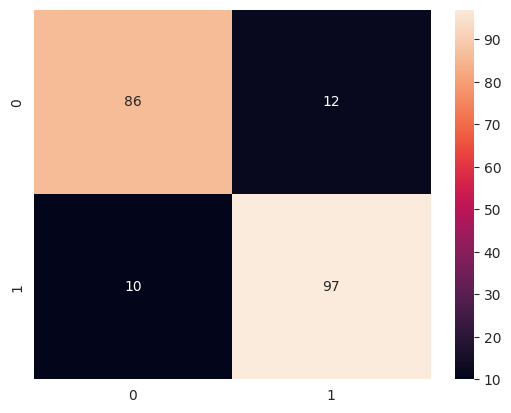

In [95]:
sns.heatmap(confusion_matrix(Y_test1, y_pred_knn3),annot = True, fmt = "d")

Precision score, Recall score, F-score:

In [96]:
precision3 = precision_score(Y_test1, y_pred_knn3)
print("Precision: ",precision3)

Precision:  0.8899082568807339


In [97]:
recall3 = recall_score(Y_test1, y_pred_knn3)
print("Recall is: ",recall3)

Recall is:  0.9065420560747663


In [98]:
print("F-Score:",(2*precision3*recall3)/(precision3+recall3))

F-Score: 0.8981481481481481


False negative rate of the model

In [99]:
CM2 = pd.crosstab(Y_test1, y_pred_knn3)
print(CM2)
TN2=CM2.iloc[0,0]
FP2=CM2.iloc[0,1]
FN2=CM2.iloc[1,0]
TP2=CM2.iloc[1,1]
fnr2 = FN2*100/(FN2+TP2)
fnr2

col_0   0.0  1.0
target          
0.0      86   12
1.0      10   97


9.345794392523365

Fold : 2

In [100]:
from sklearn.neighbors import KNeighborsClassifier
knn = train_model(X_train2, Y_train2, X_test2, Y_test2, KNeighborsClassifier, n_neighbors=8)

knn.fit(X_train2, Y_train2)

y_pred_knn4 = knn.predict(X_test2)
print(y_pred_knn4)

Train accuracy: 79.41%
Test accuracy: 78.76%
[1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1.
 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1.
 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0.
 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.
 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1.
 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0.
 1. 1.

In [101]:
knn_scores1 = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train2, Y_train2)
    knn_scores1.append(knn_classifier.score(X_test2, Y_test2))

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

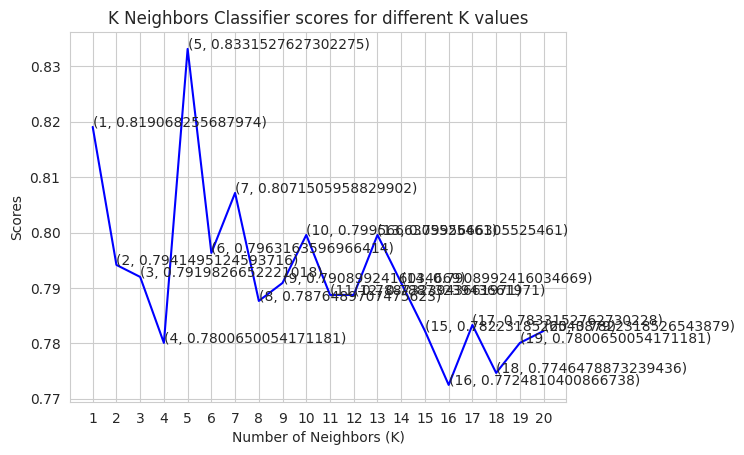

In [102]:
plt.plot([k for k in range(1, 21)], knn_scores1,color = 'blue')
for i in range(1,21):
    plt.text(i, knn_scores1[i-1], (i, knn_scores1[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [103]:
knn_scores1

[0.819068255687974,
 0.7941495124593716,
 0.7919826652221018,
 0.7800650054171181,
 0.8331527627302275,
 0.7963163596966414,
 0.8071505958829902,
 0.7876489707475623,
 0.7908992416034669,
 0.7995666305525461,
 0.7887323943661971,
 0.7887323943661971,
 0.7995666305525461,
 0.7908992416034669,
 0.7822318526543879,
 0.7724810400866738,
 0.7833152762730228,
 0.7746478873239436,
 0.7800650054171181,
 0.7822318526543879]

In [104]:
score_knn4 = round(accuracy_score(y_pred_knn4,Y_test2)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn4)+" %")

The accuracy score achieved using KNN is: 78.76 %


In [105]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
model = train_model(X_train2, Y_train2, X_test2, Y_test2, KNeighborsClassifier)

Train accuracy: 87.25%
Test accuracy: 83.32%


In [106]:
# Seek optimal 'n_neighbours' parameter
for i in range(1,10):
    print("n_neigbors = "+str(i))
    train_model(X_train2, Y_train2, X_test2, Y_test2, KNeighborsClassifier, n_neighbors=i)

n_neigbors = 1
Train accuracy: 100.00%
Test accuracy: 81.91%
n_neigbors = 2
Train accuracy: 90.20%
Test accuracy: 79.41%
n_neigbors = 3
Train accuracy: 85.29%
Test accuracy: 79.20%
n_neigbors = 4
Train accuracy: 84.31%
Test accuracy: 78.01%
n_neigbors = 5
Train accuracy: 87.25%
Test accuracy: 83.32%
n_neigbors = 6
Train accuracy: 83.33%
Test accuracy: 79.63%
n_neigbors = 7
Train accuracy: 80.39%
Test accuracy: 80.72%
n_neigbors = 8
Train accuracy: 79.41%
Test accuracy: 78.76%
n_neigbors = 9
Train accuracy: 76.47%
Test accuracy: 79.09%


Confusion matrix

<Axes: >

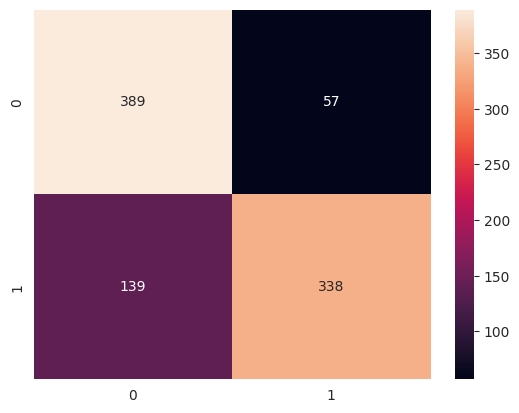

In [107]:
sns.heatmap(confusion_matrix(Y_test2, y_pred_knn4),annot = True, fmt = "d")

Precision score, Recall score, F-score:

In [108]:
precision4 = precision_score(Y_test2, y_pred_knn4)
print("Precision: ",precision4)

Precision:  0.8556962025316456


In [109]:
recall4 = recall_score(Y_test2, y_pred_knn4)
print("Recall is: ",recall4)

Recall is:  0.7085953878406709


In [110]:
print("F-Score:",(2*precision4*recall4)/(precision4+recall4))

F-Score: 0.7752293577981652


False negative rate of the model

In [111]:
CM3 = pd.crosstab(Y_test2, y_pred_knn4)
print(CM3)
TN3=CM3.iloc[0,0]
FP3=CM3.iloc[0,1]
FN3=CM3.iloc[1,0]
TP3=CM3.iloc[1,1]
fnr3 = FN3*100/(FN3+TP3)
fnr3

col_0   0.0  1.0
target          
0.0     389   57
1.0     139  338


29.140461215932913

As we can see the best parameter is with fold 1

Model Comparision

In [112]:
# initialize an empty list
accuracy = []

# list of algorithms names
classifiers = ['KNN', 'Random Forests']

# list of algorithms with parameters
models = [KNeighborsClassifier(n_neighbors=8), RandomForestClassifier(n_estimators=100, random_state=0)]

# loop through algorithms and append the score into the list
for i in models:
    model = i
    model.fit(X_train1, Y_train1)
    score = model.score(X_test1, Y_test1)
    accuracy.append(score)


In [113]:
# create a dataframe from accuracy results
summary = pd.DataFrame({'accuracy':accuracy}, index=classifiers)
summary

,accuracy
KNN,0.892683
Random Forests,1.000000


Random forest is accurate